### Student Information
Name: Lindsey Anne Yu 楊真珠

Student ID: 112065423

GitHub ID: LindseyAnneYu

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__.

In [183]:
# downloading necessary
!pip install umap
!pip install umap-learn
!pip install PAMI
!pip install -U pami
import PAMI

In [184]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [185]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)
#This command also shuffles the data randomly, but with random_state we can bring the same distribution of data everytime
#if we choose the same number, in this case "42". This is good for us, it means we can reproduce the same results every time
#we want to run the code.

twenty_train.data[0:2]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

### **>>> Exercise 1 (Watch Video):**  

In [186]:
for text in twenty_train.data[:3]:
    print(text)

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

In [187]:
# mounting drive because using colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [188]:
!cp /content/drive/MyDrive/Colab\ Notebooks/DM\ lab1/helpers/data_mining_helpers.py /content
#Tut: https://www.youtube.com/watch?v=YP6APKLRf58

In [189]:
import pandas as pd

# my functions
import data_mining_helpers as dmh

In [190]:
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [191]:
# add category to the dataframe
X['category'] = twenty_train.target

In [192]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### **>>> Exercise 2 (take home):**
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information.

In [193]:
# Technique of choice = random sampling
# Randomly select (with replacement) 10% of the rows
X.sample(frac=0.1, replace=True)

text  category  \
1291  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
865   From: sandy@nmr1.pt.cyanamid.COM (Sandy Silver...         2   
1291  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
2020  From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...         0   
1261  From: sandvik@newton.apple.com (Kent Sandvik) ...         0   
...                                                 ...       ...   
2047  From: stark@dwovax.enet.dec.com (Todd I. Stark...         2   
2171  From: gilham@csl.sri.com (Fred Gilham) Subject...         3   
1098  From: db7n+@andrew.cmu.edu (D. Andrew Byler) S...         3   
1165  Subject: Re: A visit from the Jehovah's Witnes...         0   
796   From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   

               category_name  
1291                 sci.med  
865                  sci.med  
1291                 sci.med  
2020             alt.atheism  
1261             alt.atheism  
...                      ...  
2047                 sci.med  
2171  soc.religion.christian  
1098  soc.religion.christian  
1165             alt.atheism  
796                  sci.med  

[226 rows x 3 columns]

### **>>> Exercise 3 (Watch Video):**  
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [194]:
# Filter records that belong to sci.med category
sci_med_records = X[X['category_name'] == 'sci.med']

# Display every 10th record but show only 5
sci_med_records[::10].head(5)

text  category category_name
7    From: aldridge@netcom.com (Jacquelin Aldridge)...         2       sci.med
49   From: jimj@contractor.EBay.Sun.COM (Jim Jones)...         2       sci.med
82   From: jason@ab20.larc.nasa.gov (Jason Austin) ...         2       sci.med
118  From: rogers@calamari.hi.com (Andrew Rogers) S...         2       sci.med
142  From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...         2       sci.med

In [195]:
#alternative
# print(X[X['category_name']=='sci.med'].iloc[::10]) for printing all, not just first 5
X[X['category_name']=='sci.med'].iloc[::10][0:5]

text  category category_name
7    From: aldridge@netcom.com (Jacquelin Aldridge)...         2       sci.med
49   From: jimj@contractor.EBay.Sun.COM (Jim Jones)...         2       sci.med
82   From: jason@ab20.larc.nasa.gov (Jason Austin) ...         2       sci.med
118  From: rogers@calamari.hi.com (Andrew Rogers) S...         2       sci.med
142  From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...         2       sci.med

### >>> **Exercise 4 (Watch Video):**
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [196]:
# Calculate missing values by row
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

### >>> **Exercise 5 (take home)**

In [197]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [198]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [199]:
# .isnull() function doesn't work as expected for all cases because .isnull() only recognizes np.nan and None as missing values.
# 'NaN' (string) and 'None' (string): These are strings, not actual null values.
# need to preprocess the data to convert these values to np.nan before using .isnull()

NA_df['missing_example'] = NA_df['missing_example'].replace(['NaN', 'None', ''], np.nan)
NA_df['missing_example'].isnull()

<ipython-input-199-807846ee7660>:5: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

### 5.1 Sampling

In [200]:
X_sample = X.sample(n=1000) #random state

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [201]:
# Compare rows
print("Row count in X:", len(X))
print("Row count in X_sample:", len(X_sample))
# datafram changes, fewer rows

# Compare category distributions
print("Category distribution in X:\n", X["category_name"].value_counts()/len(X))
print("Category distribution in X_sample:\n", X_sample["category_name"].value_counts()/len(X_sample))
# Slight variation in data distribution, but I believe still negligible

# Compare indices
print("First few indices in X:", X.index[:5])
print("First few indices in X_sample:", X_sample.index[:5])
# The index in X_sample still refers to the original row indices from X
# Indices are not reset to sequential values starting from 0
# This could  affect operations that rely on continuous sequential indexing

# I don't know how to do it yet, but when tokenized, it might be possible that the distribution of words will be different


Row count in X: 2257
Row count in X_sample: 1000
Category distribution in X:
 category_name
soc.religion.christian    0.265397
sci.med                   0.263181
comp.graphics             0.258751
alt.atheism               0.212672
Name: count, dtype: float64
Category distribution in X_sample:
 category_name
soc.religion.christian    0.273
comp.graphics             0.268
sci.med                   0.251
alt.atheism               0.208
Name: count, dtype: float64
First few indices in X: RangeIndex(start=0, stop=5, step=1)
First few indices in X_sample: Index([977, 2066, 1522, 255, 368], dtype='int64')


In [202]:
import matplotlib.pyplot as plt
%matplotlib inline

### >>> **Exercise 7 (Watch Video):**

<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

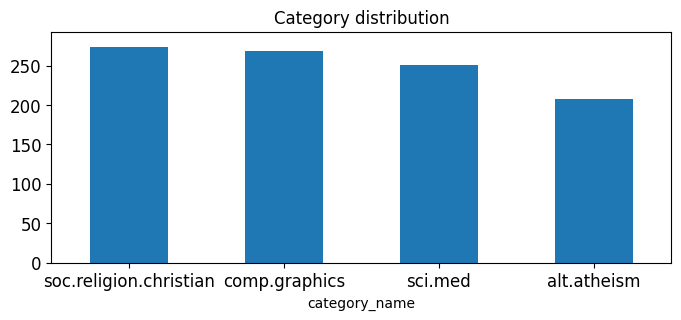

In [203]:
#set upper bound to the max
upper_bound = max(X_sample.category_name.value_counts() + 20)

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound],
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8 (take home):**
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

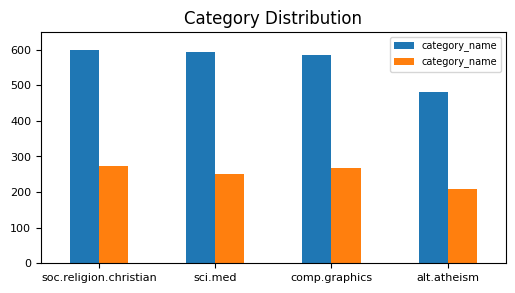

In [204]:
X_counts = X['category_name'].value_counts()
X_sample_counts = X_sample['category_name'].value_counts()

upper_bound = max(X.category_name.value_counts() + 50)

sidebside_counts = pd.concat([X_counts, X_sample_counts], axis= 1)

sidebside_counts.plot(kind='bar',
                  title='Category Distribution',
                  ylim=[0, upper_bound],
                  rot=0, fontsize=8, figsize=(6, 3), width=0.5)

plt.xlabel('')
plt.legend(labels=['category_name', 'category_name'], fontsize=7)

In [205]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [206]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and

#return document-term matrix
print(X_counts[0])

  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


### **>>> Exercise 9 (Watch Video):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [207]:
analyze = count_vect.build_analyzer()
analyze(X['text'][0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [208]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '0000', '0000001200', '000005102000', '0001',
       '000100255pixel', '00014', '000406', '0007'], dtype=object)

In [209]:
# Answer here

# Get feature names and the fifth record
feature_names = count_vect.get_feature_names_out()
fifth_record_vector = X_counts[4]

# Find index of second 1 in the vector
indices = fifth_record_vector.nonzero()[1]
feature_names[indices[1]]


'subject'

### **>>> Exercise 11 (take home):**
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

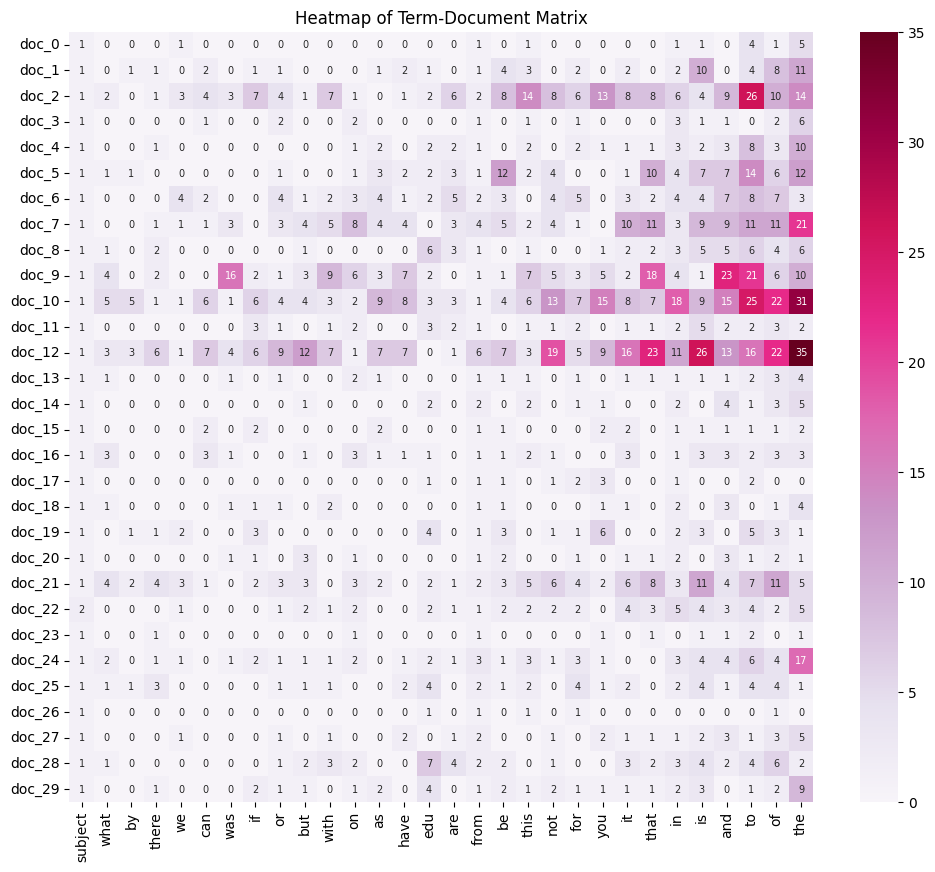

In [210]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust the number of documents and terms to display
top_n_docs = 30
top_n_terms = 30

# Get the most frequent terms
term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()
top_term_indices = np.argsort(term_frequencies)[-top_n_terms:]  # Top terms by frequency

# Use fixed indices
top_doc_indices = np.arange(top_n_docs)  # Select documents

# Subset the term-document matrix for these top terms and documents
plot_z = X_counts[top_doc_indices, :][:, top_term_indices].toarray()
plot_x = [count_vect.get_feature_names_out()[i] for i in top_term_indices]
plot_y = ["doc_" + str(i) for i in top_doc_indices]

# figure size
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(12, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=np.max(plot_z),
                 annot=True, fmt="d", annot_kws={"size": 7})
plt.xticks(rotation=90)  # readability
plt.yticks(rotation=0)   # y-axis labels horizontal
plt.title('Heatmap of Term-Document Matrix')
plt.show()


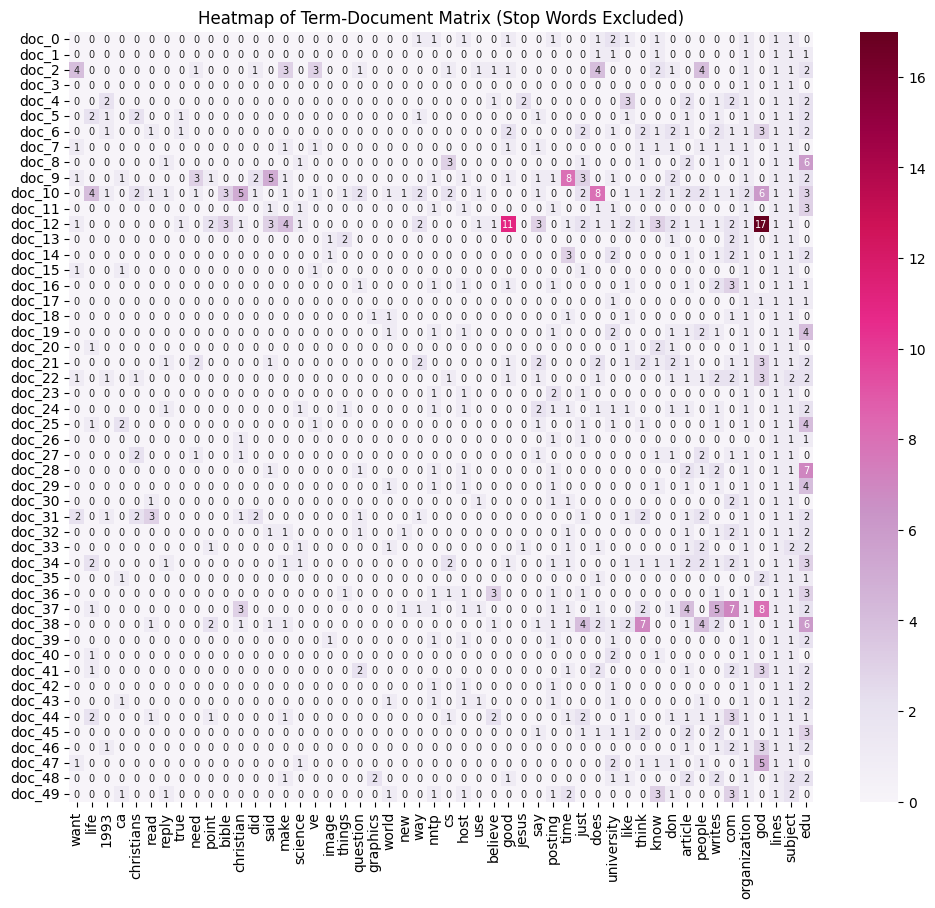

In [211]:
#variation: remove stop words. but it is quite empty
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(X['text'])

top_n_docs = 50
top_n_terms = 50


term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()
top_term_indices = np.argsort(term_frequencies)[-top_n_terms:]  # Top terms by frequency

top_doc_indices = np.arange(top_n_docs)

plot_z = X_counts[top_doc_indices, :][:, top_term_indices].toarray()
plot_x = [count_vect.get_feature_names_out()[i] for i in top_term_indices]
plot_y = ["doc_" + str(i) for i in top_doc_indices]

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(12, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=np.max(plot_z),
                 annot=True, fmt="d", annot_kws={"size": 7})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Heatmap of Term-Document Matrix (Stop Words Excluded)')
plt.show()


### >>> **Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [212]:
# Answer here
import plotly.express as px
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Use the same CountVectorizer and term frequencies from previous steps
count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(X.text)

# Get the term frequencies
term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()

# Create a DataFrame for Plotly
terms_df = pd.DataFrame({
    'Term': count_vect.get_feature_names_out()[:300],
    'Frequency': term_frequencies[:300]
})

# Create an interactive bar chart using Plotly
fig = px.bar(terms_df, x='Term', y='Frequency', title='Term Frequencies (Top 300 Terms)')
fig.update_layout(xaxis_tickangle=-90, height=600, width=1000)  # Rotate x-axis labels and adjust size

# Show the interactive chart
fig.show()




### >>> **Exercise 13 (take home):**
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.


In [213]:
# Answer here Apply a Frequency Threshold:

# Initialize CountVectorizer with English stop words
count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(X.text)

# Get the term frequencies across all documents
term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()

# Define a frequency threshold (e.g., terms must appear at least 10 times)
frequency_threshold = 10

# Filter terms that appear more than the threshold number of times
filtered_term_indices = np.where(term_frequencies >= frequency_threshold)[0]

# Limit to the top N terms (e.g., 100) that pass the frequency threshold, but don't sort them by frequency
top_n_terms = 100
top_filtered_indices = filtered_term_indices[:top_n_terms]  # Take the first N terms as they appear

# Create a DataFrame with the filtered terms (unsorted)
terms_df = pd.DataFrame({
    'Term': count_vect.get_feature_names_out()[top_filtered_indices],
    'Frequency': term_frequencies[top_filtered_indices]
})

# Plot the terms without sorting by frequency
fig = px.bar(terms_df, x='Term', y='Frequency', title=f'Term Frequencies (Top {top_n_terms} Terms with Threshold)')
fig.update_layout(xaxis_tickangle=-90, height=600, width=1000)
fig.show()



### >>> **Exercise 14 (take home):**
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [214]:
# Answer here
# Define a frequency threshold (e.g., terms must appear at least 10 times)
frequency_threshold = 10

# Filter terms that appear more than the threshold number of times
filtered_term_indices = np.where(term_frequencies >= frequency_threshold)[0]

# Limit to the top N terms from those that pass the frequency threshold
top_filtered_indices = np.argsort(term_frequencies[filtered_term_indices])[-top_n_terms:]

# Create a DataFrame with the top filtered terms
terms_df = pd.DataFrame({
    'Term': count_vect.get_feature_names_out()[filtered_term_indices][top_filtered_indices],
    'Frequency': term_frequencies[filtered_term_indices][top_filtered_indices]
})

# Sort the DataFrame by frequency in descending order
terms_df = terms_df.sort_values(by='Frequency', ascending=False)

# Plot as before, but now the most frequent terms are on the left
fig = px.bar(terms_df, x='Term', y='Frequency', title=f'Term Frequencies (Top {top_n_terms} Terms with Threshold)')
fig.update_layout(xaxis_tickangle=-90, height=600, width=1000)
fig.show()




In [215]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

<ipython-input-216-95b72ce9758d>:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



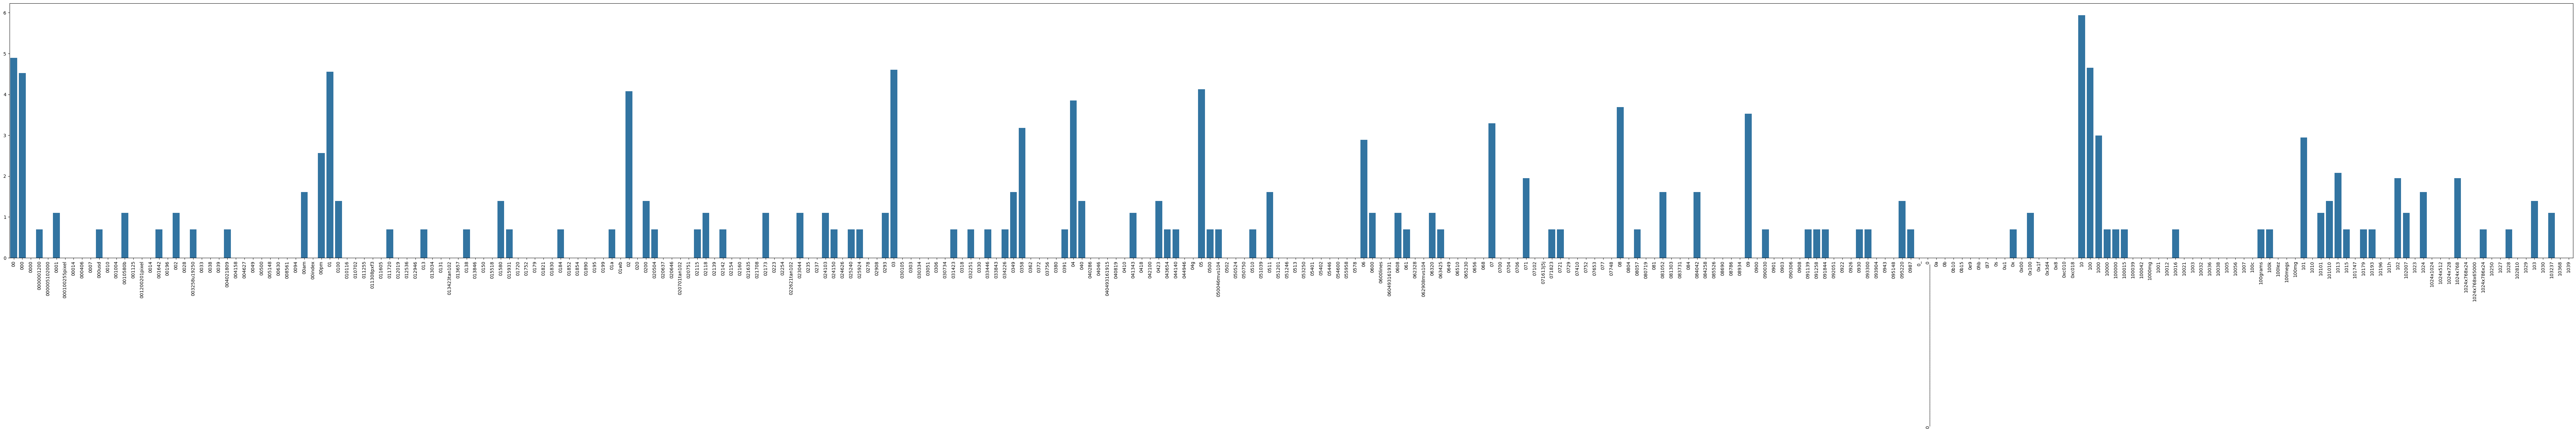

In [216]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 15 (take home):**
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

<ipython-input-217-69bff8962825>:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



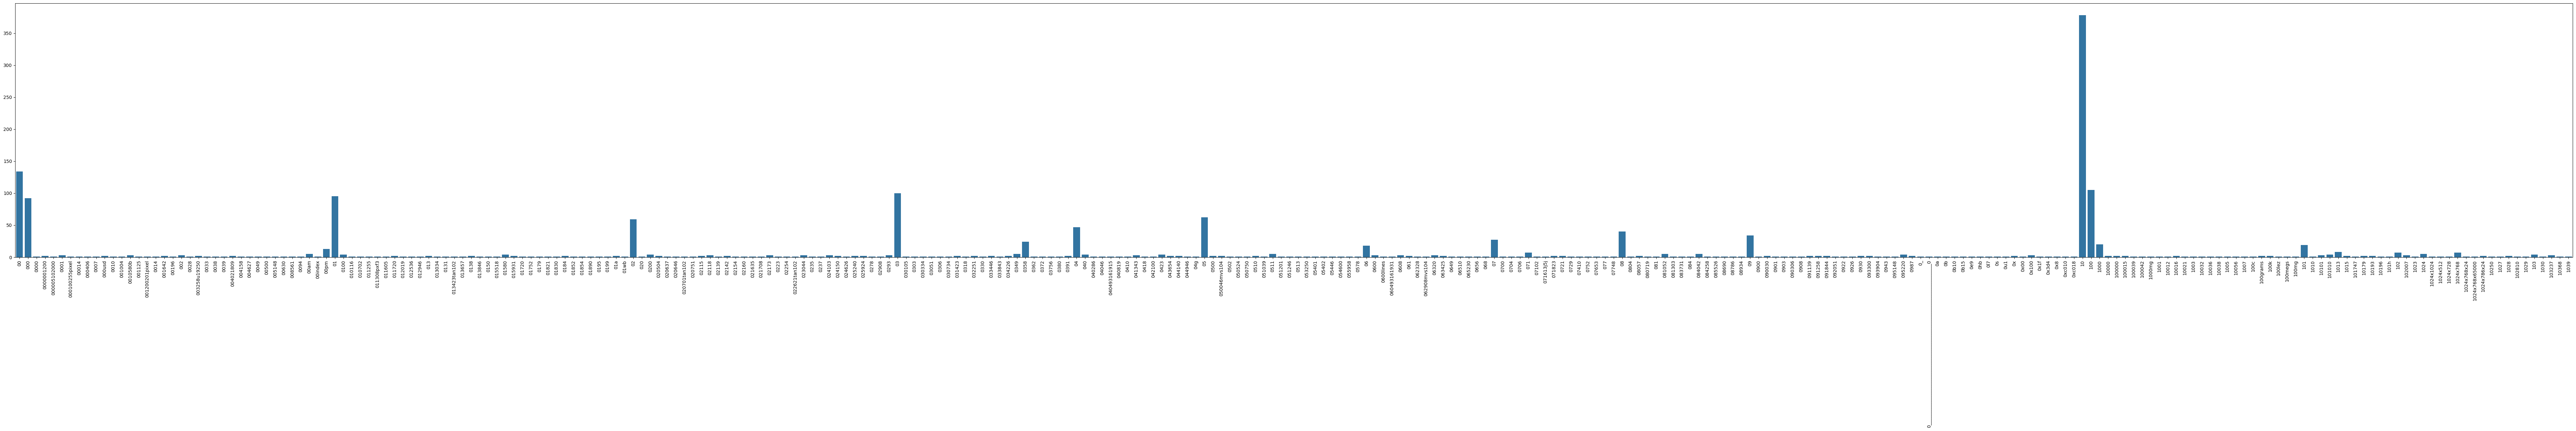

In [217]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

# i highly prefer the log plot, it looks more balanced. its good for when values are extremely high and extremely low, like in our case
# where there's a large range of values, the log scale helps flatten the plot
# the smaller values became invisible on a raw linear scale because they are so near the bottom of the plot
# the log scale helped reveal relative differences in the smaller values, which can get lost on a linear scale

In [218]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts

    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()

    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)

    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [219]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)

    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()

    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)

    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category comp.graphics we filter the following words:
Bottom 1.0% words: 
initworld    1
jkpg         1
jiu1         1
jiu          1
jfreund      1
            ..
lab2         1
laaksone     1
l4v          1
l300         1
l14h11       1
Length: 137, dtype: int64
Top 5.0% words: 
40               27
distributed      27
open             27
multi            27
getting          27
               ... 
is             1751
and            2382
of             2470
to             2775
the            4537
Length: 687, dtype: int64

For category soc.religion.christian we filter the following words:
Bottom 1.0% words: 
disparate       1
expose          1
explosive       1
resisting       1
exploitation    1
               ..
fence           1
feminist        1
remarriage      1
remarried       1
remeber         1
Length: 138, dtype: int64
Top 5.0% words: 
pagan        36
claims       36
gave         36
parts        36
jr           37
          ...  
that       4393
and        4409
to        

000  000005102000  000100255pixel  0007  000usd  0010580b  \
0      0             0               0     0       0         0   
1      0             0               0     0       0         0   
2      0             0               0     0       0         0   
3      0             0               0     0       0         0   
4      0             0               0     0       0         0   
..   ...           ...             ...   ...     ...       ...   
579    0             0               0     0       0         0   
580    0             0               0     0       0         0   
581    0             0               0     0       0         0   
582    0             0               0     0       0         0   
583    0             0               0     0       0         0   

     001200201pixel  00196  002  0028  ...  zorn  zrz  zsoft  zt  zug  zurich  \
0                 0      0    0     0  ...     0    0      0   0    0       0   
1                 0      0    0     0  ...     0    0      0   0    0       0   
2                 0      0    0     0  ...     0    0      0   0    0       0   
3                 0      0    0     0  ...     0    0      0   0    0       0   
4                 0      0    0     0  ...     0    0      0   0    0       0   
..              ...    ...  ...   ...  ...   ...  ...    ...  ..  ...     ...   
579               0      0    0     0  ...     0    0      0   0    0       0   
580               0      0    0     0  ...     0    0      0   0    0       0   
581               0      0    0     0  ...     0    0      0   0    0       0   
582               0      0    0     0  ...     0    0      0   0    0       0   
583               0      0    0     0  ...     0    0      0   0    0       0   

     zvi  zyeh  zyxel  ªl  
0      0     0      0   0  
1      0     0      0   0  
2      0     0      0   0  
3      0     0      0   0  
4      0     0      0   0  
..   ...   ...    ...  ..  
579    0     0      0   0  
580    0     0      0   0  
581    0     0      0   0  
582    0     0      0   0  
583    0     0      0   0  

[584 rows x 12932 columns]

### >>> **Exercise 16 (take home):**
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

I like that many stop words have been filtered out
when i removed the stop words earlier, i saw the word "edu" as a top word and I wanted to manually remove it to, because I had a hunch that edu was just referring to the .edu at the end of websites
this idea was confirmed when i also saw "com" as a frequent word. But then, I would've had to remove these manually after identifying them
taking percentages takes off words arbitrarily, able to remove all stop words, but I'm afraid they might remove any relevant words
in the top 5% of words in alt.atheism, the word "court" got removed. In soc.religion.christian, pagan got removed. I think this could give context into the documents and shouldnt have been removed. the same goes for sci.med, the words toxic, genetic, answer, and rose could have proven to be useful.
I like that this not only removes stop words, but also unintelligible words that are likely only mentioned once and does not contribute to making meaningful insights into our data (eg. jkpg, jiu, laaksone, etc.)
In terms of the differences, the most repeated words aside from the stop words and gibberish words are highly related to each field. However, this also brings up the fact again that some relevant words got filtered out

In [220]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile=r'/content/drive/MyDrive/Colab Notebooks/DM lab1/td_freq_db_sci_med.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()

Frequent patterns were generated successfully using frequentPatternGrowth algorithm


In [221]:
obj1.save('freq_patterns_sci_med_minSup9.txt') #save the patterns

In [222]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile=r'/content/drive/MyDrive/Colab Notebooks/DM lab1/td_freq_db_alt_atheism.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()

Frequent patterns were generated successfully using frequentPatternGrowth algorithm


In [223]:
obj2.save('freq_patterns_alt_atheism_minSup9.txt') #save the patterns

In [224]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile=r'/content/drive/MyDrive/Colab Notebooks/DM lab1/td_freq_db_comp_graphics.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()

Frequent patterns were generated successfully using frequentPatternGrowth algorithm


In [225]:
obj3.save('freq_patterns_comp_graphics_minSup9.txt') #save the patterns

In [226]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj4 = alg.FPGrowth(iFile=r'/content/drive/MyDrive/Colab Notebooks/DM lab1/td_freq_db_soc_religion_christian.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_soc_religion_christian= obj4.getPatternsAsDataFrame()

Frequent patterns were generated successfully using frequentPatternGrowth algorithm


In [227]:
obj4.save('freq_patterns_soc_religion_minSup9.txt') #save the patterns

In [228]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_soc_religion_christian, frequentPatternsDF_comp_graphics, frequentPatternsDF_alt_atheism]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                        Patterns  Support
19911                        gov       33
19912                  institute       33
57158                    snm6394       32
19910                       form       31
57156                    deleted       30
...                          ...      ...
54045  axes funds motss matching        9
54044   boy funds motss matching        9
54043    boy axes motss matching        9
54042    et funds motss matching        9
0                          swell        9

[57159 rows x 2 columns]
Number of patterns discarded: 2304


In [229]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
0      0    0     0           0             0     0               0      0   
1      0    0     0           0             0     0               0      0   
2      0    0     0           0             0     0               0      0   
3      0    0     0           0             0     0               0      0   
4      1    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
2252   0    0     0           0             0     0               0      1   
2253   0    0     0           0             0     0               0      0   
2254   0    0     0           0             0     0               0      0   
2255   0    0     0           0             0     0               0      0   
2256   0    0     0           0             0     0               0      0   

      000406  0007  ...  soc princeton funds motss matching  \
0          0     0  ...                                   0   
1          0     0  ...                                   0   
2          0     0  ...                                   0   
3          0     0  ...                                   0   
4          0     0  ...                                   0   
...      ...   ...  ...                                 ...   
2252       0     0  ...                                   0   
2253       0     0  ...                                   0   
2254       0     0  ...                                   0   
2255       0     0  ...                                   0   
2256       0     0  ...                                   0   

      soc princeton boy motss matching  et axes motss matching  \
0                                    0                       0   
1                                    0                       0   
2                                    0                       0   
3                                    0                       0   
4                                    0                       0   
...                                ...                     ...   
2252                                 0                       0   
2253                                 0                       0   
2254                                 0                       0   
2255                                 0                       0   
2256                                 0                       0   

      soc princeton et motss matching  soc princeton al motss matching  \
0                                   0                                0   
1                                   0                                0   
2                                   0                                0   
3                                   0                                0   
4                                   0                                0   
...                               ...                              ...   
2252                                0                                0   
2253                                0                                0   
2254                                0                                0   
2255                                0                                0   
2256                                0                                0   

      axes funds motss matching  boy funds motss matching  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   
...                         ...                       ...   
2252                          0                         0   
2253                          0                         0   
2254                          0                         0   
2255                

### >>> **Exercise 17 (take home):**
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance.

In [230]:
from PAMI.frequentPattern.topk import FAE as alg

# List of k values to run
k_values = [500, 1000, 1500]

# Loop through each k value and run the algorithm
for k in k_values:
    # Initialize FAE Top-K algorithm with current k value
    fae = alg.FAE(
        iFile=r'/content/drive/MyDrive/Colab Notebooks/DM lab1/td_freq_db_comp_graphics.csv',
        k=k
    )

    # Run the mining algorithm
    fae.mine()

    # Get the patterns found by the algorithm
    fae_results = fae.getPatterns()
    print(f"Total number of Frequent Patterns for k={k}: {len(fae_results)}")

    # Get patterns as DataFrame and print
    fae_df = fae.getPatternsAsDataFrame()
    print(fae_df)

    # Get the runtime and print it
    run_time = fae.getRuntime()
    print(f"Total Execution Time for k={k} in seconds: {run_time}")

 TopK frequent patterns were successfully generated using FAE algorithm.
Total number of Frequent Patterns for k=500: 500
                                              Patterns  Support
0                                                maybe       26
1                                                 life       24
2                                                ideas       24
3                                                 feel       24
4                                                tried       24
..                                                 ...      ...
495  awful posts curious concerning proposed learn ...       12
496  posts curious concerning proposed learn forum ...       12
497  convenience posts curious concerning proposed ...       12
498  posts curious concerning proposed learn forum ...       12
499  posts curious concerning proposed learn forum ...       12

[500 rows x 2 columns]
Total Execution Time for k=500 in seconds: 1.5122761726379395
 TopK frequent patterns 

In [231]:
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg

# List of minimum support thresholds to test
min_support_values = [3, 6, 9]

# Loop through each minimum support value and run the algorithm
for min_support in min_support_values:
    # Initialize MaxFPGrowth algorithm with min_support as a positional argument
    fpg = alg.MaxFPGrowth(
        r'/content/drive/MyDrive/Colab Notebooks/DM lab1/td_freq_db_comp_graphics.csv',
        min_support
    )

    # Run the mining algorithm
    fpg.mine()

    # Get the patterns found by the algorithm
    fpg_results = fpg.getPatterns()
    print(f"Total number of Frequent Patterns for min_support={min_support}:", len(fpg_results))

    # Save the results to a file
    output_file = f'fpg_comp_graphics_{min_support}.txt'
    fpg.save(output_file)

    # Get patterns as DataFrame and print
    fpg_df = fpg.getPatternsAsDataFrame()
    print(f"Patterns for min_support={min_support}:\n", fpg_df)

    # Get the runtime and print it
    run = fpg.getRuntime()
    print(f"Total ExecutionTime for min_support={min_support} in seconds:", run)


Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total number of Frequent Patterns for min_support=3: 6872
Patterns for min_support=3:
                                                Patterns  Support
0     due bytes responsible 000 opinion 640x480 rob ...        3
1                                                  bag         3
2                                          garbo uwasa         3
3             wrong 200 responsible 000 umn 480 640 tc         3
4                                responsible 000 essex         3
...                                                 ...      ...
6867                                    didn wondering         3
6868                             feel wrong personally         3
6869                                     wrong correct         3
6870                                      life correct         3
6871                                        maybe life         4

[6872 rows x 2 columns]
Total ExecutionTime for 

The output counts and runtime vary across algorithms, especially when using different k values and support thresholds. FPGrowth generated more patterns with higher supports, while MaxFPGrowth at lower thresholds generated patterns with a smaller set.

In terms of execution time and pattern count analysis, higher minSup values in MaxFPGrowth and smaller k values in FAE Top-K yielded quicker results, indicating they are more efficient for larger datasets. Additionally, I found that patterns that are unique to each category (eg., comp.graphics and sci.med) can be more informative for classification tasks.

### 5.5 Dimensionality Reduction

In [232]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

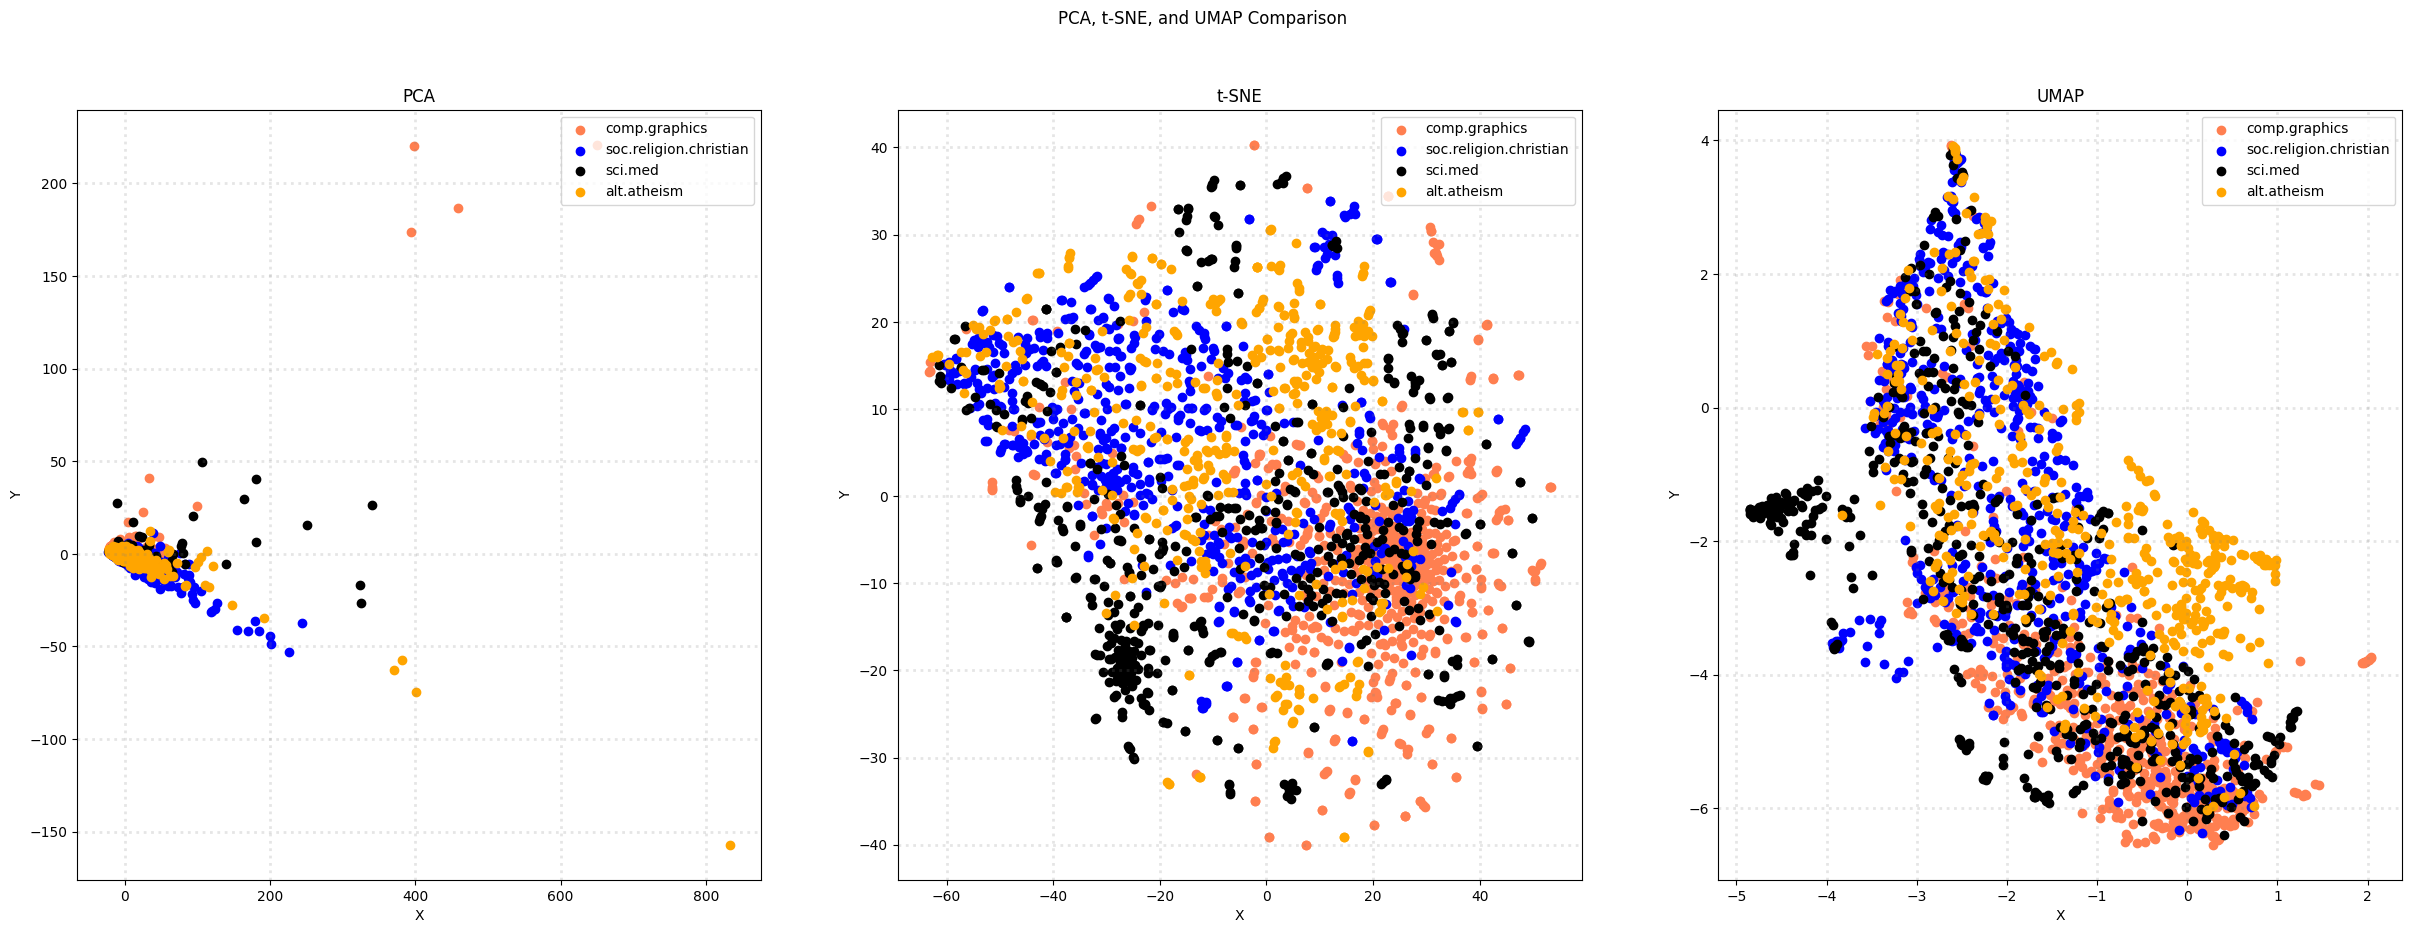

In [233]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [234]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

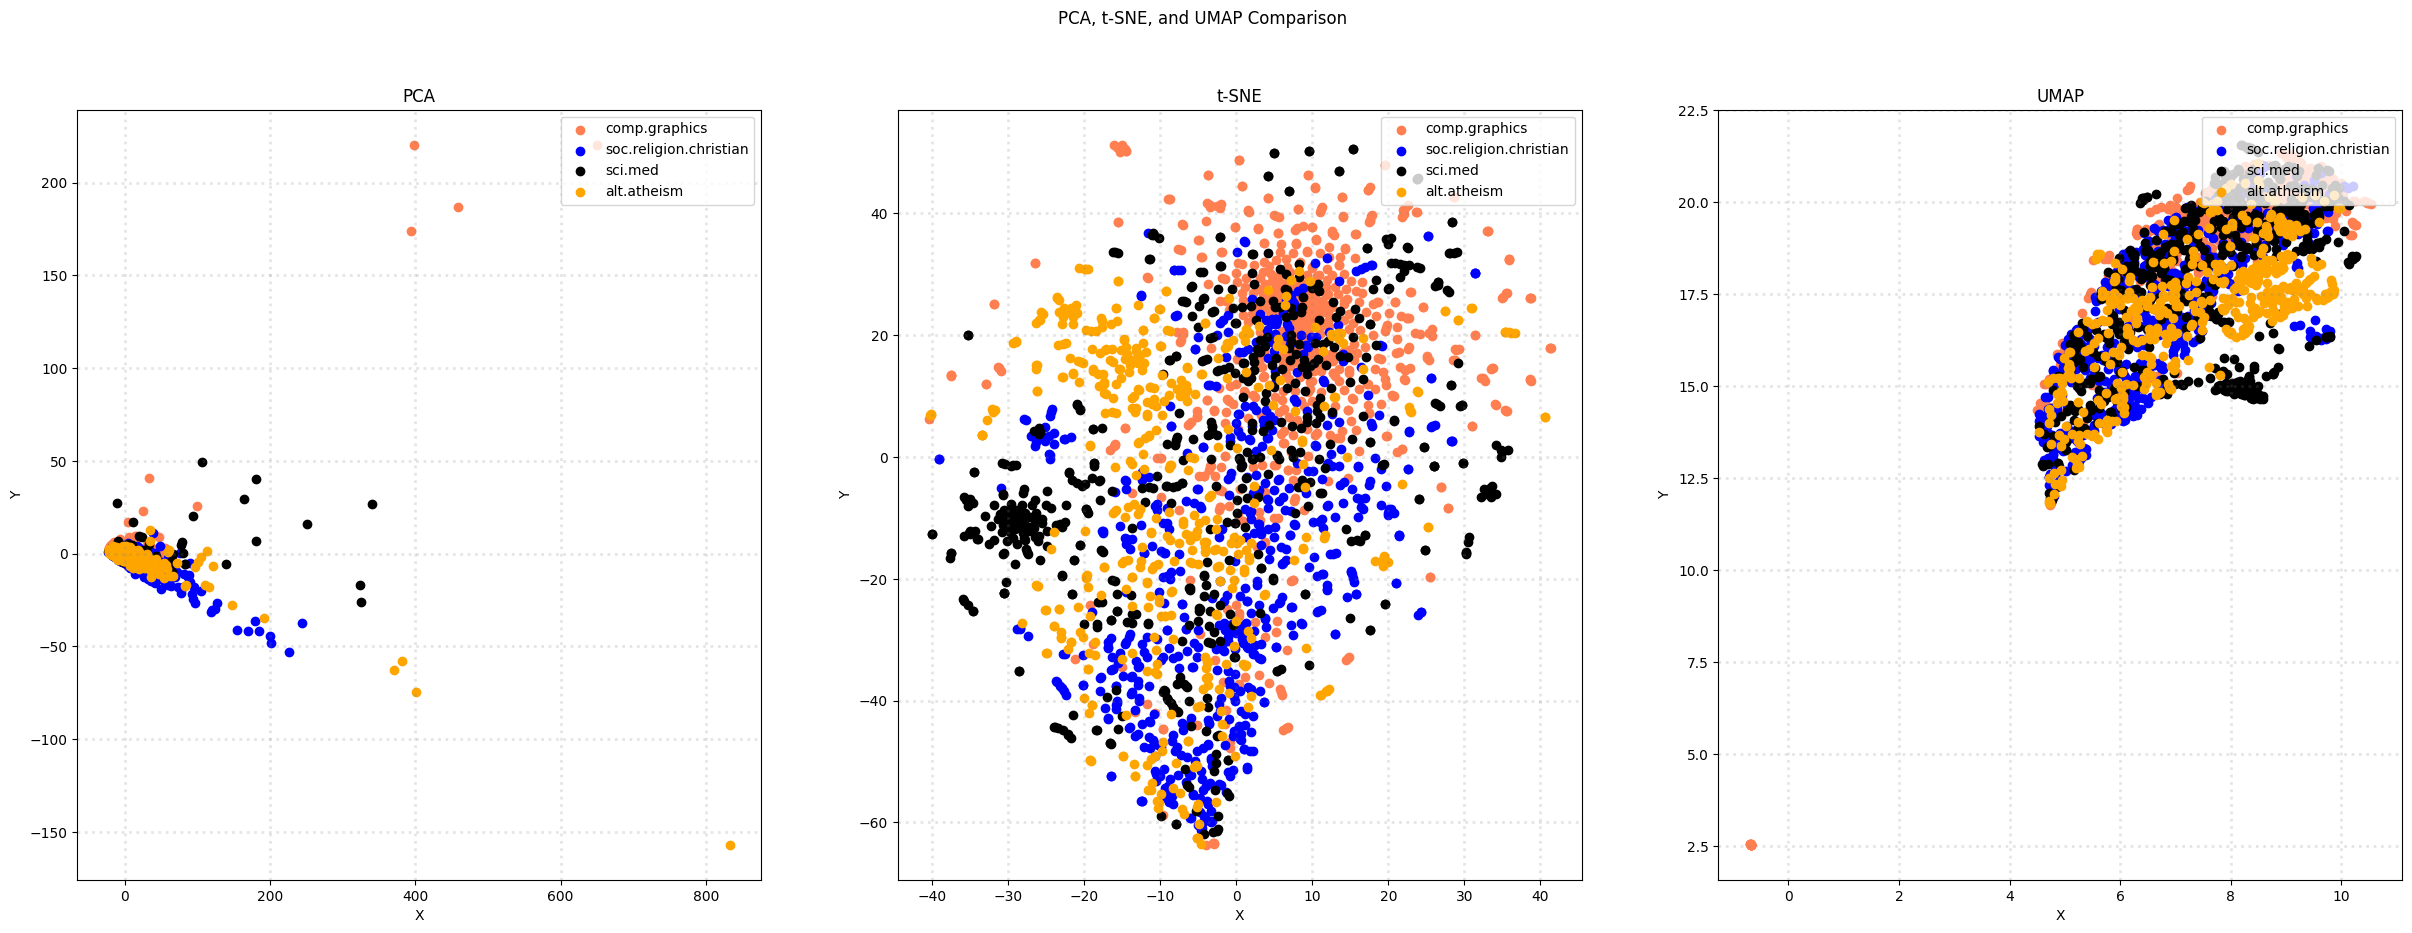

In [235]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

### >>> Exercise 18 (take home):

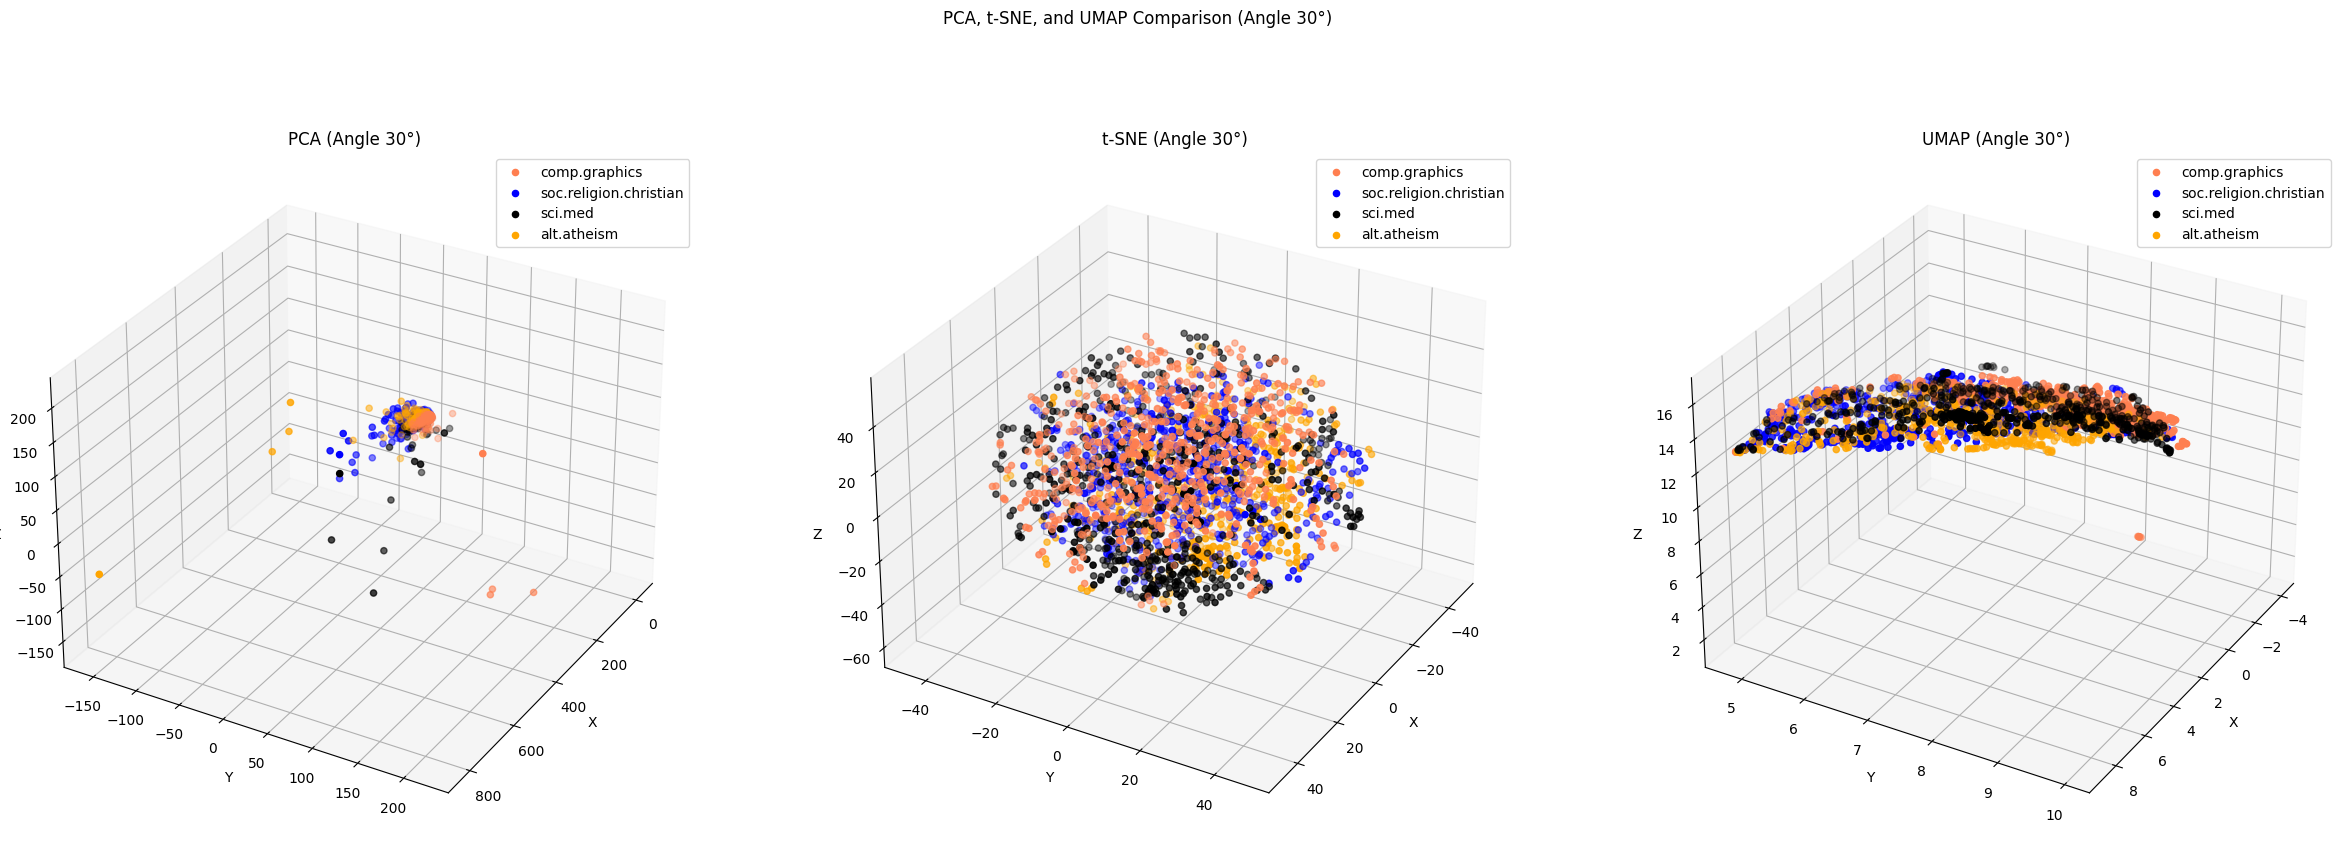

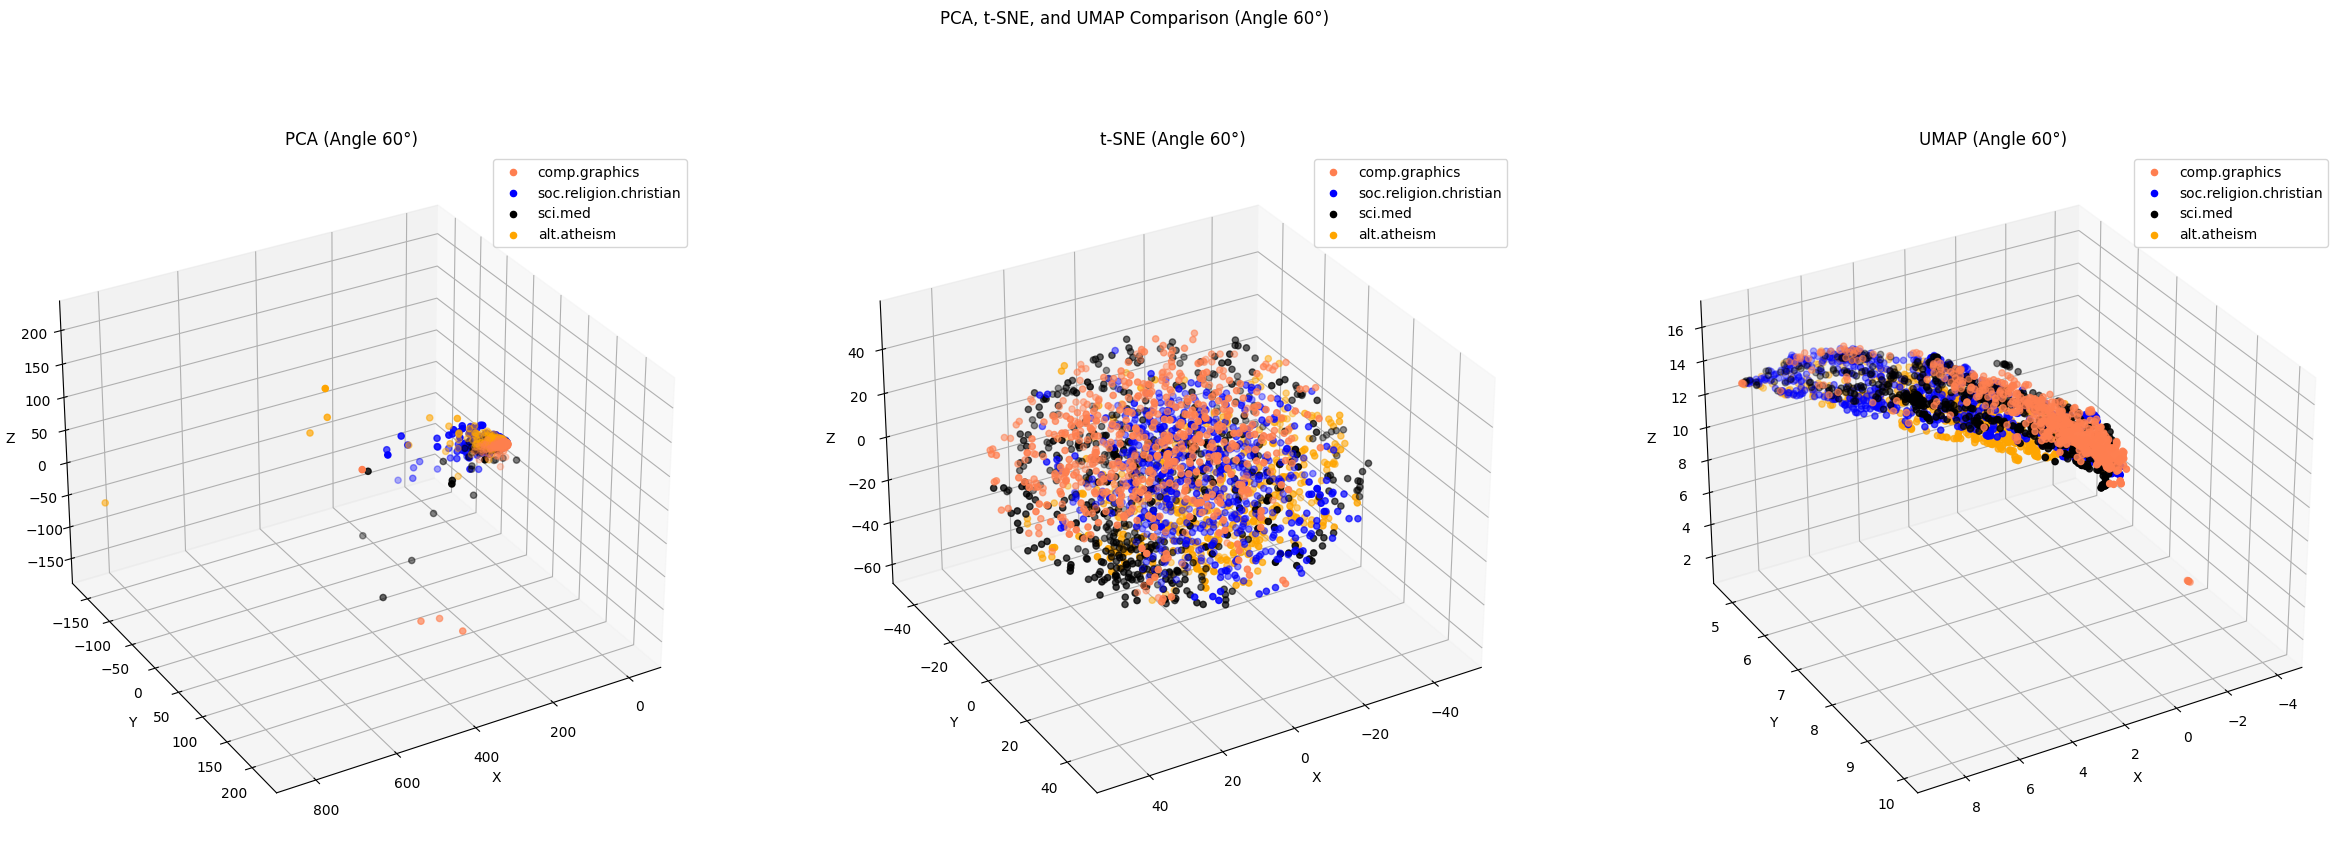

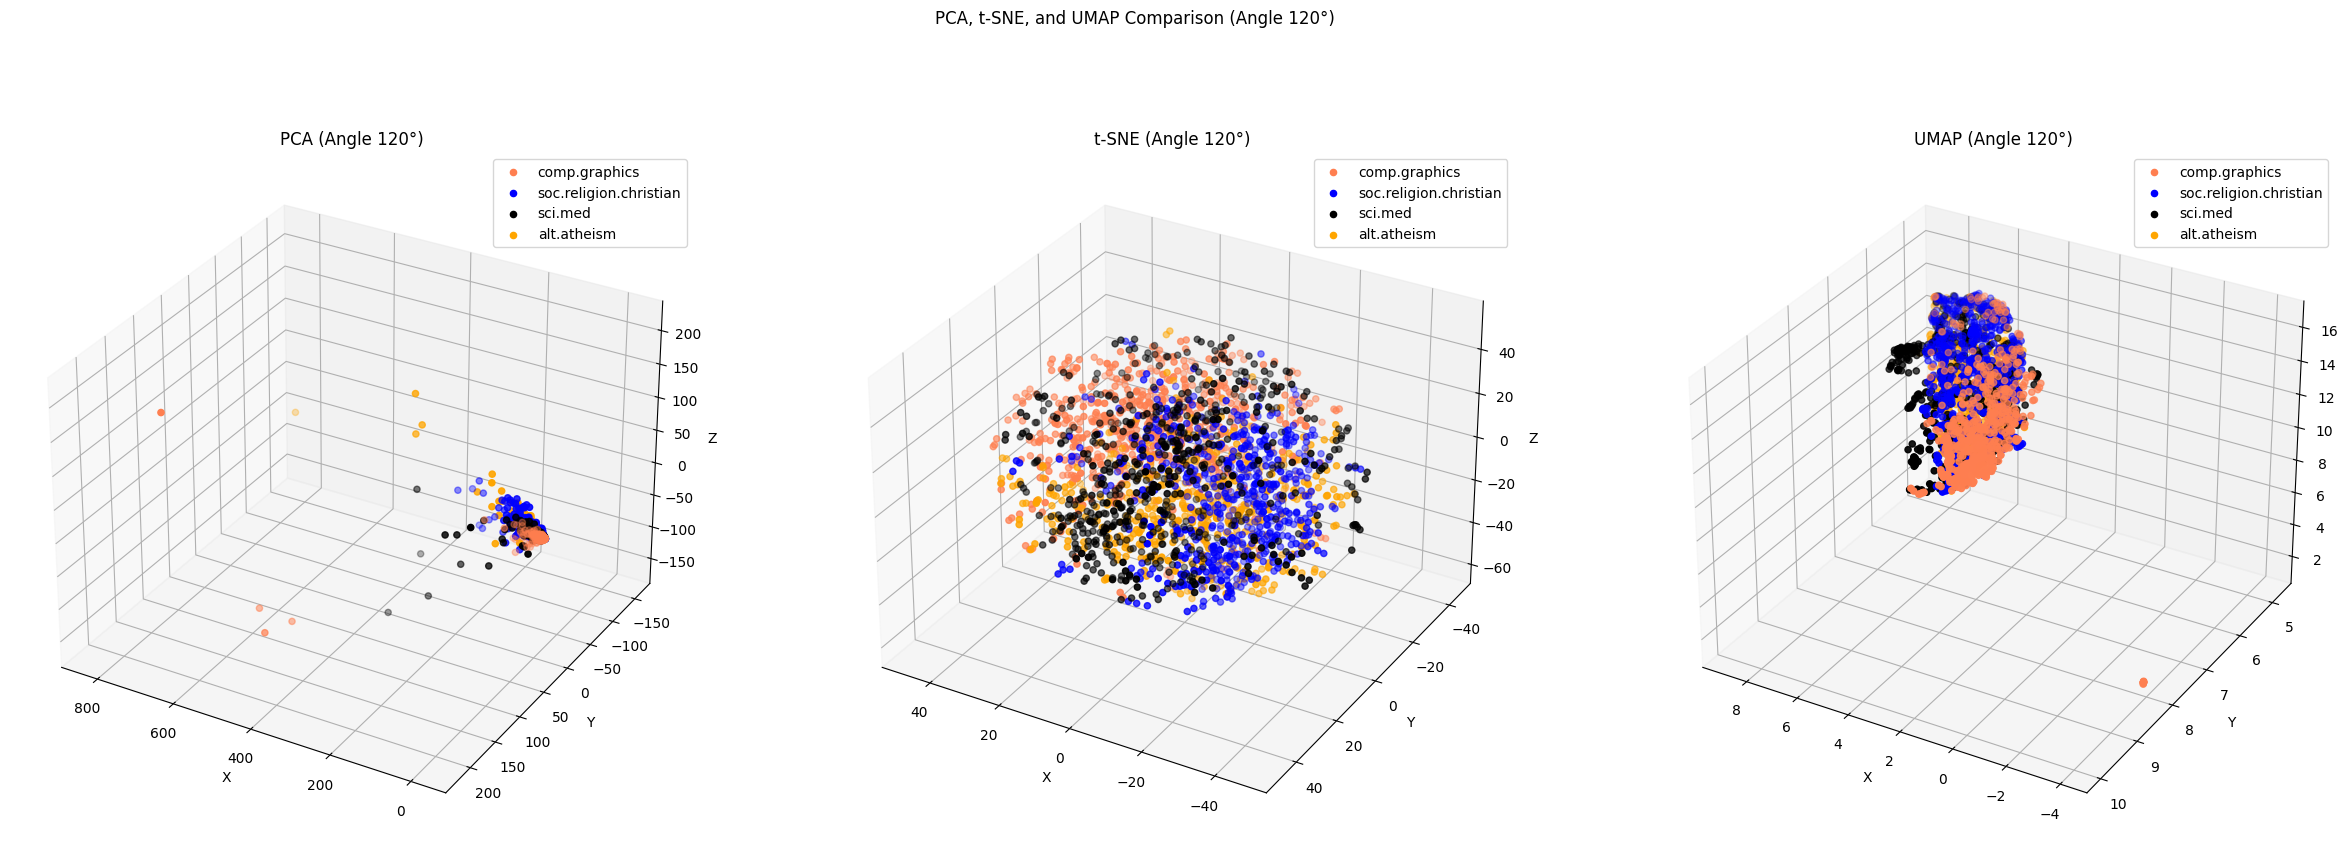

In [236]:
from mpl_toolkits.mplot3d import Axes3D

# Perform 3D dimensionality reduction
X_pca_aug_3d = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug_3d = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug_3d = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

# Define colors and categories for plotting
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()

# Function to create a 3D scatter plot for each method and angle
def plot_scatter_3d(fig, X_reduced, title, position, angle):
    ax = fig.add_subplot(position, projection='3d')
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(f"{title} (Angle {angle}°)")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')
    ax.view_init(30, angle)

# List of angles to view the plots from
angles = [30, 60, 120]

# Plot the PCA, t-SNE, and UMAP visualizations for each angle
for angle in angles:
    fig = plt.figure(figsize=(30, 10))
    fig.suptitle(f'PCA, t-SNE, and UMAP Comparison (Angle {angle}°)')

    plot_scatter_3d(fig, X_pca_aug_3d, 'PCA', 131, angle)
    plot_scatter_3d(fig, X_tsne_aug_3d, 't-SNE', 132, angle)
    plot_scatter_3d(fig, X_umap_aug_3d, 'UMAP', 133, angle)

    plt.show()


**PCA:**
Although there are some groupings, there is a clear overlap between categories (e.g., comp.graphics, soc.religion.christian, and sci.med). There’s no sharp separation of categories, indicating PCA retains the overall structure but might not effectively capture nuanced patterns in the data.

When the angle changes, I expect to see a change in the visibility of a certain group. However in PCA, I don't notice this separation as much. It is consistently alt.atheism that's the most prominent.

Also, due to random initialization in the dimensionality reduction algorithms, particularly t-SNE and UMAP, the outputting graphs have some variations each run.

### >>> Exercise 18 (take home):

In [237]:
import pandas as pd

# Perform one-hot encoding (binarization) on the 'category_name' column
category_binarized_df = pd.get_dummies(X['category_name'])

# Add the binarized columns to the original dataset
X = pd.concat([X, category_binarized_df], axis=1)

# Display the first few rows of the updated dataset
print(X.head())


#yes binarization of the category_name column works as expected in terms of transforming categorical values into binary form

                                                text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   

                                      tokenized_text  alt.atheism  \
0  {like, Collier), HPGL, plotter), tif/img/tga, ... 

#**PART 2**

In [238]:
import pandas as pd

#import dataset
X = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")
X[0:9]

sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...
5      nostalgia  Every time I heard this song as a child, I use...
6      nostalgia  My dad loved listening to Jim Reeves, when I w...
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...
8  not nostalgia           Wherever you  are you always in my heart

In [239]:
# Binary sentiment label
X['sentiment_label'] = X.sentiment.apply(lambda x: int(x == 'nostalgia'))
X[0:9]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4      nostalgia  listening to his songs reminds me of my mum wh...   
5      nostalgia  Every time I heard this song as a child, I use...   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...   
8  not nostalgia           Wherever you  are you always in my heart   

   sentiment_label  
0                0  
1                1  
2                1  
3                0  
4                1  
5                1  
6                1  
7                1  
8                0

In [240]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))
# Select only columns with hashable data types (e.g., strings, numbers)
hashable_columns = [col for col in X.columns if X[col].apply(lambda x: isinstance(x, (str, int, float))).all()]

# Check for duplicates in hashable columns only
duplicate_count = sum(X[hashable_columns].duplicated())
print("Number of duplicates:", duplicate_count)

# Convert unhashable columns to strings temporarily, if needed
X_temp = X.applymap(lambda x: str(x) if isinstance(x, list) else x)

# Drop duplicates from the temporary DataFrame and reassign to X
X = X_temp.drop_duplicates(keep=False).copy()


Number of duplicates: 1


<ipython-input-240-f58971232e30>:10: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [241]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X_features = X['comment']  # This will be the text data
y = X['sentiment_label']   # This is the binary sentiment label you created

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Check the sizes of the training and testing sets
print(f"Training data size: {X_train.shape[0]}")
print(f"Test data size: {X_test.shape[0]}")


Training data size: 1198
Test data size: 300


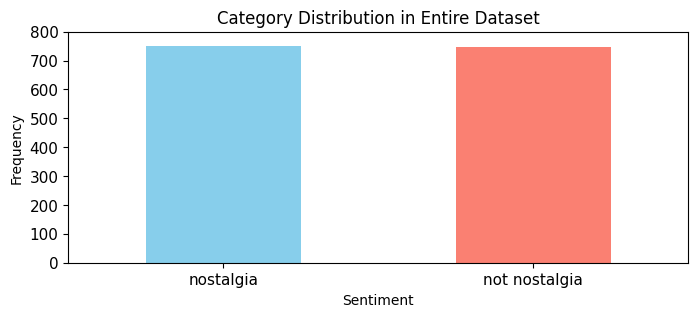

In [242]:
import matplotlib.pyplot as plt

# Calculate the value counts for the sentiment categories in the entire dataset
sentiment_counts = X['sentiment'].value_counts()

# Define an upper bound for the y-axis for better visualization
upper_bound = max(sentiment_counts) + 50

# Plot the bar chart
sentiment_counts.plot(kind='bar',
                      title='Category Distribution in Entire Dataset',
                      ylim=[0, upper_bound],
                      rot=0, fontsize=11, figsize=(8, 3),
                      color=['skyblue', 'salmon'])

# Label the axes
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


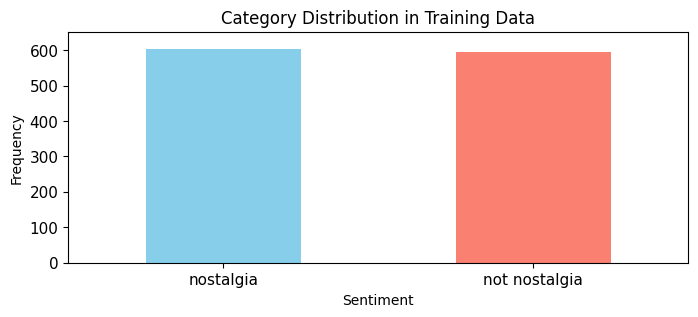

In [243]:
import matplotlib.pyplot as plt

# Map the binary labels back to the original sentiment categories
y_train_mapped = y_train.map({1: 'nostalgia', 0: 'not nostalgia'})

# Calculate the value counts for the sentiment categories in the training data
train_sentiment_counts = y_train_mapped.value_counts()

# Define an upper bound for the y-axis for better visualization
upper_bound = max(train_sentiment_counts) + 50

# Plot the bar chart
train_sentiment_counts.plot(kind='bar',
                            title='Category Distribution in Training Data',
                            ylim=[0, upper_bound],
                            rot=0, fontsize=11, figsize=(8, 3),
                            color=['skyblue', 'salmon'])

# Label the axes
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


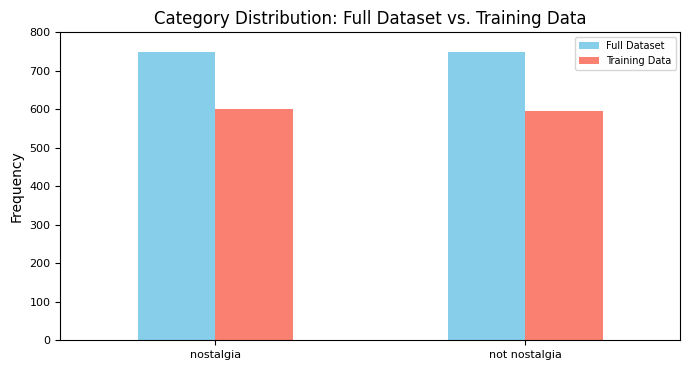

In [244]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the value counts for each sentiment in the entire dataset and training data
full_counts = X['sentiment'].value_counts()
train_counts = y_train.map({1: 'nostalgia', 0: 'not nostalgia'}).value_counts()

# Combine the counts into a single DataFrame for side-by-side plotting
side_by_side_counts = pd.concat([full_counts, train_counts], axis=1, keys=['Full Dataset', 'Training Data'])

# Define an upper bound for the y-axis for better visualization
upper_bound = max(side_by_side_counts.max()) + 50

# Plot the side-by-side bar chart
side_by_side_counts.plot(kind='bar',
                         title='Category Distribution: Full Dataset vs. Training Data',
                         ylim=[0, upper_bound],
                         rot=0, fontsize=8, figsize=(8, 4), width=0.5,
                         color=['skyblue', 'salmon'])

# Label the axes and add a legend
plt.xlabel('')
plt.ylabel('Frequency')
plt.legend(labels=['Full Dataset', 'Training Data'], fontsize=7)
plt.show()


Confirming that the training data is as evenly distributed as the original data.

## Feature creation

In [245]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [246]:
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))

In [247]:
X[0:4]["unigrams"]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

## Feature subset selection

In [248]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment)
print(X_counts[0])

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [249]:
analyze = count_vect.build_analyzer()
analyze(X.comment[0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [250]:
# check the shape of this matrix by:
X_counts.shape

(1498, 3730)

In [251]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [252]:
X_counts.shape

(1498, 3730)

In [253]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

## Heat map
Generating the most frequent words, alongside the documents where these words also appear the most. Excluding stop words.

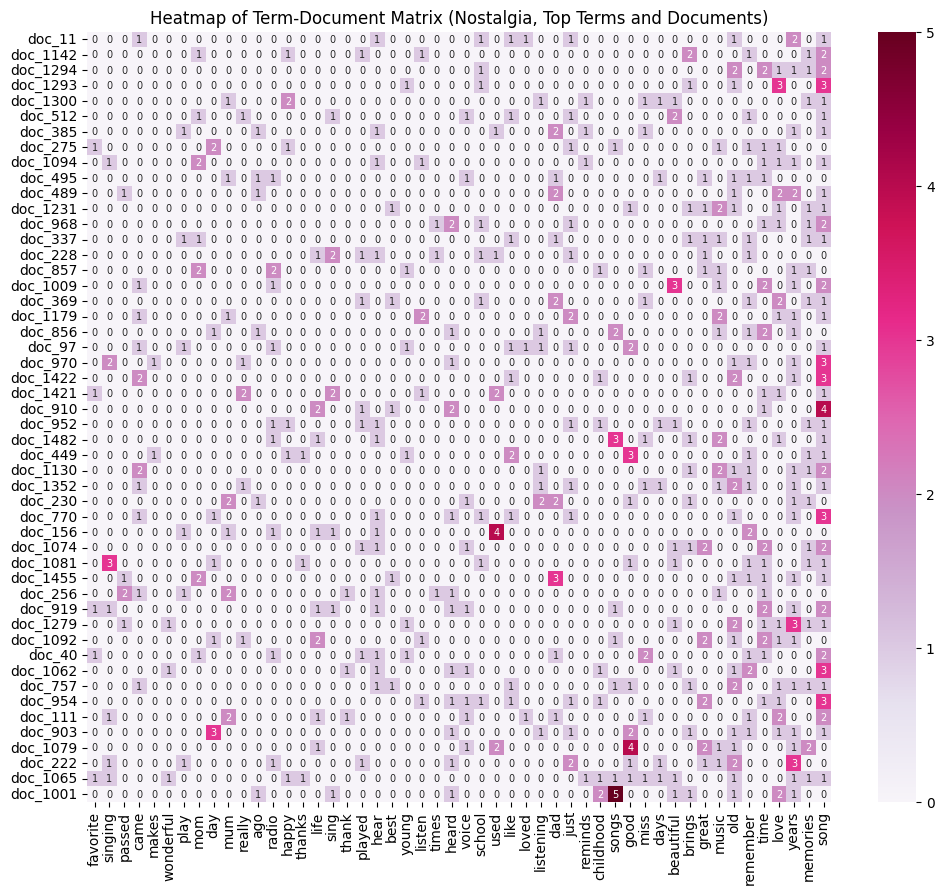

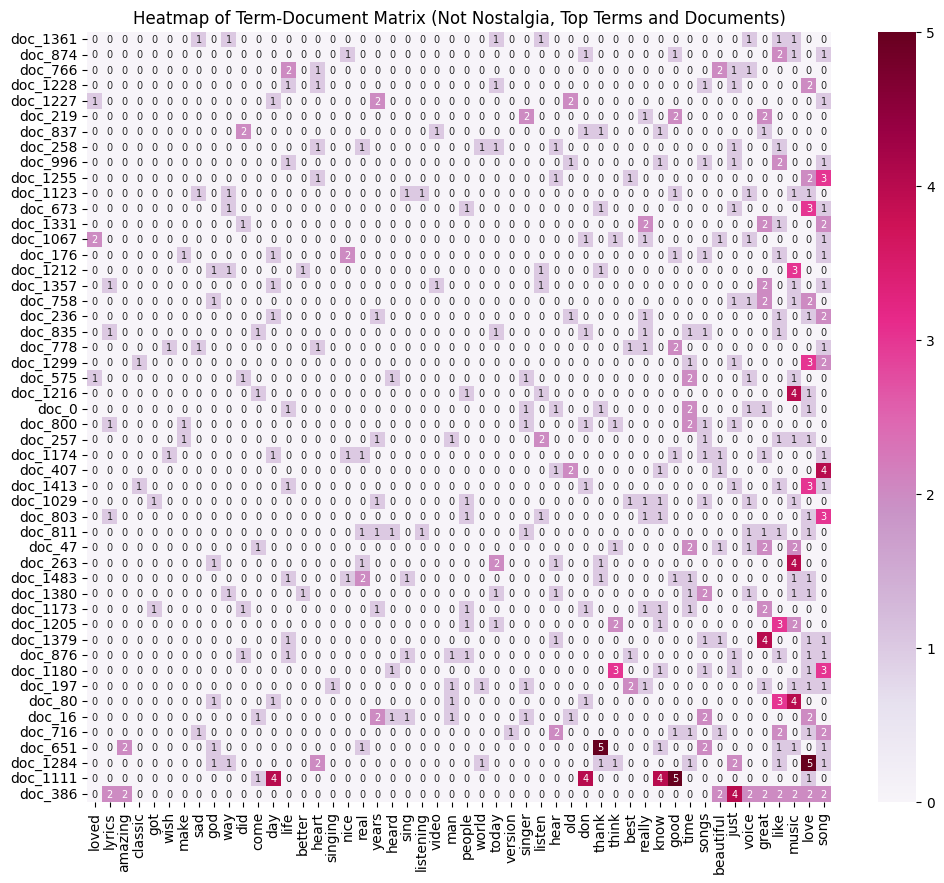

In [254]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to generate a heatmap for a given subset with the highest-occurrence documents
def generate_heatmap(data, title):
    # Create the term-document matrix without stop words
    count_vect = CountVectorizer(stop_words='english')
    X_counts = count_vect.fit_transform(data['comment'])

    # Define the number of terms and documents to display in the heatmap
    top_n_terms = 50  # Show the top 50 terms by frequency
    top_n_docs = 50  # Show up to the top 50 documents based on frequency

    # Get the most frequent terms
    term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()
    top_term_indices = np.argsort(term_frequencies)[-top_n_terms:]  # Indices of top terms by frequency

    # Sum the frequencies for each document in the subset for the selected top terms
    top_terms_matrix = X_counts[:, top_term_indices]
    doc_term_sums = np.asarray(top_terms_matrix.sum(axis=1)).ravel()

    # Select the top documents based on total frequency of top terms
    top_doc_indices = np.argsort(doc_term_sums)[-top_n_docs:]

    # Subset the term-document matrix for these top terms and documents
    plot_z = X_counts[top_doc_indices, :][:, top_term_indices].toarray()
    plot_x = [count_vect.get_feature_names_out()[i] for i in top_term_indices]
    plot_y = ["doc_" + str(data.index[i]) for i in top_doc_indices]  # Original indices for clarity

    # Create the heatmap DataFrame and plot it
    df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
    plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(df_todraw,
                     cmap="PuRd",
                     vmin=0, vmax=np.max(plot_z),
                     annot=True, fmt="d", annot_kws={"size": 7})
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.title(f'Heatmap of Term-Document Matrix ({title}, Top Terms and Documents)')
    plt.show()

# Separate data into nostalgia and not nostalgia subsets
nostalgia_data = X[X['sentiment'] == 'nostalgia']
not_nostalgia_data = X[X['sentiment'] == 'not nostalgia']

# Generate heatmaps for each subset
generate_heatmap(nostalgia_data, 'Nostalgia')
generate_heatmap(not_nostalgia_data, 'Not Nostalgia')


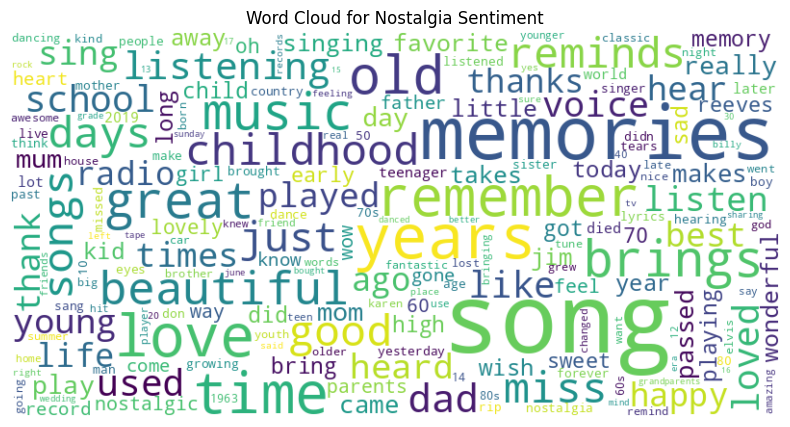

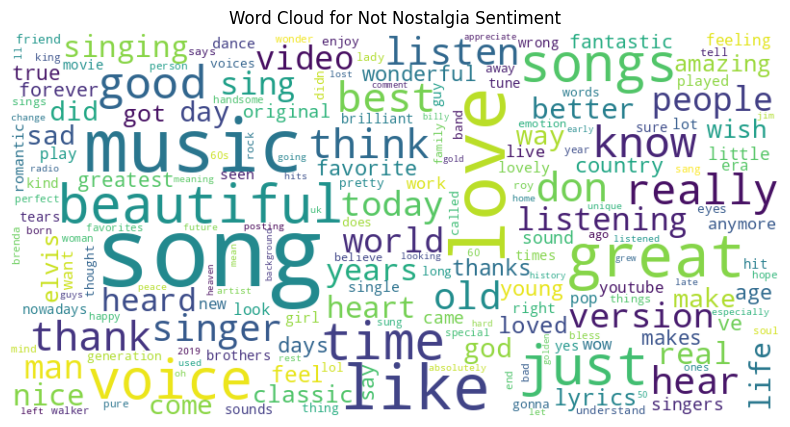

In [255]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Function to generate a word cloud for a given subset with adjusted font scaling
def generate_word_cloud(data, title):
    # Create the term-document matrix without stop words
    count_vect = CountVectorizer(stop_words='english')
    X_counts = count_vect.fit_transform(data['comment'])

    # Calculate term frequencies
    term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()
    terms = count_vect.get_feature_names_out()

    # Create a dictionary of terms and their frequencies
    term_freq_dict = {terms[i]: term_frequencies[i] for i in range(len(terms))}

    # Generate the word cloud with adjusted font scaling
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          colormap='viridis', max_font_size=100, relative_scaling=0.5)
    wordcloud.generate_from_frequencies(term_freq_dict)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {title} Sentiment')
    plt.show()

# Separate data into nostalgia and not nostalgia subsets
nostalgia_data = X[X['sentiment'] == 'nostalgia']
not_nostalgia_data = X[X['sentiment'] == 'not nostalgia']

# Generate word clouds for each subset
generate_word_cloud(nostalgia_data, 'Nostalgia')
generate_word_cloud(not_nostalgia_data, 'Not Nostalgia')


## Attribute Transformation / Aggregation

In [256]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [257]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0]

1

In [258]:
import re
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import plotly.express as px

# Initialize CountVectorizer with English stop words removed
count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(X['comment'])

# Get the term frequencies across all documents
term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()

# Define a frequency threshold (e.g., terms must appear at least 10 times)
frequency_threshold = 10

# Filter terms that appear more than the threshold number of times
filtered_term_indices = np.where(term_frequencies >= frequency_threshold)[0]

# Limit to the top N terms (e.g., 100) that pass the frequency threshold
top_n_terms = 100
top_filtered_indices = filtered_term_indices[:top_n_terms]  # Take the first N terms that meet the threshold

# Filter out terms that contain any numbers
filtered_terms = [
    count_vect.get_feature_names_out()[i] for i in top_filtered_indices
    if not re.search(r'\d', count_vect.get_feature_names_out()[i])
]
filtered_frequencies = [
    term_frequencies[i] for i in top_filtered_indices
    if not re.search(r'\d', count_vect.get_feature_names_out()[i])
]

# Create a DataFrame with the filtered terms
terms_df = pd.DataFrame({
    'Term': filtered_terms,
    'Frequency': filtered_frequencies
})

# Plot the terms without sorting by frequency
fig = px.bar(terms_df, x='Term', y='Frequency', title=f'Term Frequencies (Top {top_n_terms} Terms with Threshold, Excluding Numbers)')
fig.update_layout(xaxis_tickangle=-90, height=600, width=1000)
fig.show()


In [259]:
import re
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import plotly.express as px

# Initialize CountVectorizer with English stop words removed
count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(X['comment'])

# Get the term frequencies across all documents
term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()

# Define a frequency threshold (e.g., terms must appear at least 10 times)
frequency_threshold = 10

# Filter terms that appear more than the threshold number of times
filtered_term_indices = np.where(term_frequencies >= frequency_threshold)[0]

# Limit to the top N terms (e.g., 100) that pass the frequency threshold
top_n_terms = 100
top_filtered_indices = filtered_term_indices[:top_n_terms]  # Take the first N terms that meet the threshold

# Filter out terms that contain any numbers
filtered_terms = [
    count_vect.get_feature_names_out()[i] for i in top_filtered_indices
    if not re.search(r'\d', count_vect.get_feature_names_out()[i])
]
filtered_frequencies = [
    term_frequencies[i] for i in top_filtered_indices
    if not re.search(r'\d', count_vect.get_feature_names_out()[i])
]

# Create a DataFrame with the filtered terms
terms_df = pd.DataFrame({
    'Term': filtered_terms,
    'Frequency': filtered_frequencies
})

# Sort terms by frequency in descending order
terms_df = terms_df.sort_values(by='Frequency', ascending=False)

# Plot the terms sorted by frequency
fig = px.bar(terms_df, x='Term', y='Frequency', title=f'Term Frequencies (Top {top_n_terms} Terms with Threshold, No Numbers, Sorted by Frequency)')
fig.update_layout(xaxis_tickangle=-90, height=600, width=1000)
fig.show()


<ipython-input-260-6ceea68f2253>:47: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




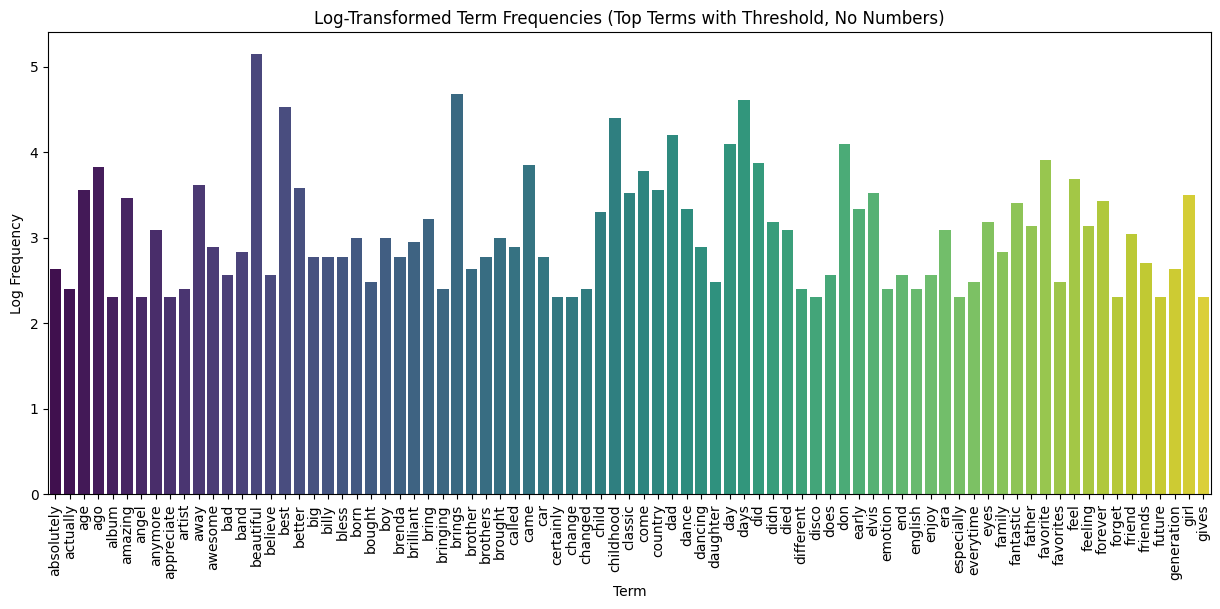

In [260]:
import re
import math
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize CountVectorizer with English stop words removed
count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(X['comment'])

# Get the term frequencies across all documents
term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()

# Define a frequency threshold (e.g., terms must appear at least 10 times)
frequency_threshold = 10

# Filter terms that appear more than the threshold number of times
filtered_term_indices = np.where(term_frequencies >= frequency_threshold)[0]

# Limit to the top N terms (e.g., 100) that pass the frequency threshold
top_n_terms = 100
top_filtered_indices = filtered_term_indices[:top_n_terms]  # Take the first N terms that meet the threshold

# Filter out terms that contain any numbers
filtered_terms = [
    count_vect.get_feature_names_out()[i] for i in top_filtered_indices
    if not re.search(r'\d', count_vect.get_feature_names_out()[i])
]
filtered_frequencies = [
    term_frequencies[i] for i in top_filtered_indices
    if not re.search(r'\d', count_vect.get_feature_names_out()[i])
]

# Apply log transformation to the frequencies
filtered_frequencies_log = [math.log(i) for i in filtered_frequencies]

# Create a DataFrame with the filtered terms and log-transformed frequencies
terms_df = pd.DataFrame({
    'Term': filtered_terms,
    'Log Frequency': filtered_frequencies_log
})

# Plot the log-transformed frequencies
plt.subplots(figsize=(15, 6))  # Adjusted for readability
sns.barplot(data=terms_df, x='Term', y='Log Frequency', palette="viridis")
plt.xticks(rotation=90)
plt.title('Log-Transformed Term Frequencies (Top Terms with Threshold, No Numbers)')
plt.xlabel('Term')
plt.ylabel('Log Frequency')
plt.show()


## Term document matrix (frequency)

In [261]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Get unique sentiment categories
categories = X['sentiment_label'].unique()
category_dfs = {category: X[X['sentiment_label'] == category].copy() for category in categories}

# Function to create term-document matrix for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()
    X_counts = count_vect.fit_transform(df['comment'])
    words = count_vect.get_feature_names_out()
    return pd.DataFrame(X_counts.toarray(), columns=words)

# Create term-document matrices for each sentiment category
filt_term_document_dfs = {category: create_term_document_df(category_dfs[category]) for category in categories}


In [262]:
# Function to filter top 5% and bottom 1% words
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.01, bottom_percent=0.01):
    word_sums = term_document_df.sum(axis=0).sort_values()
    total_words = len(word_sums)
    top_n, bottom_n = int(top_percent * total_words), int(bottom_percent * total_words)
    words_to_remove = pd.concat([word_sums.head(bottom_n), word_sums.tail(top_n)]).index
    return term_document_df.drop(columns=words_to_remove)

# Apply filtering for each category
filt_test_term_document_dfs = {category: filter_top_bottom_words_by_sum(df) for category, df in filt_term_document_dfs.items()}


In [263]:
from PAMI.extras.convert.DF2DB import DF2DB

for category, df in filt_test_term_document_dfs.items():
    obj = DF2DB(df)
    obj.convert2TransactionalDatabase(f'td_freq_db_{category}.csv', '>=', 1)


Database size (total no of transactions) : 750
Number of items : 2251
Minimum Transaction Size : 1
Average Transaction Size : 14.753333333333334
Maximum Transaction Size : 56
Standard Deviation Transaction Size : 10.5504102079282
Variance in Transaction Sizes : 111.45976858032932
Sparsity : 0.9934458759070043


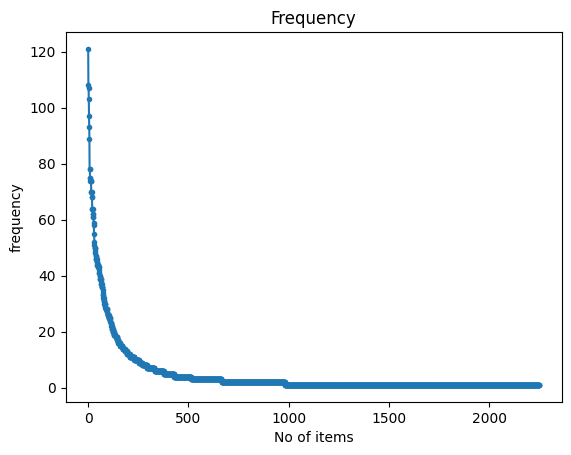

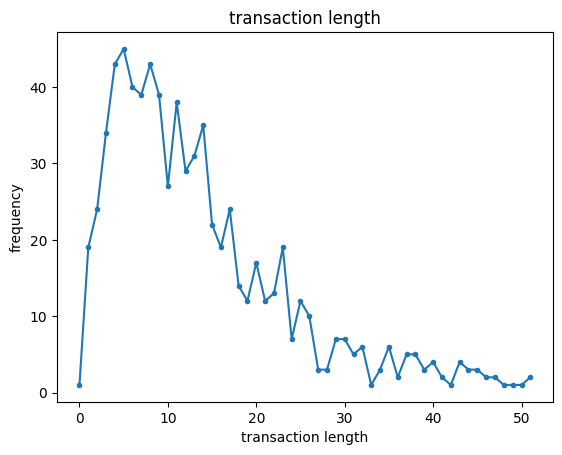

In [264]:
from PAMI.extras.dbStats import TransactionalDatabase as tds

csv_url = "td_freq_db_1.csv"  # Adjust for each category as needed
obj = tds.TransactionalDatabase(csv_url)
obj.run()
obj.printStats()
obj.plotGraphs()


In [265]:
from PAMI.frequentPattern.topk import FAE
from PAMI.frequentPattern.maximal import MaxFPGrowth


# FAE Top-K for top 500 patterns
miner = FAE.FAE(iFile='td_freq_db_0.csv', k=500)
miner.mine()
print('Top-K Runtime =', miner.getRuntime())
frequentPatternsDF_0 = miner.getPatternsAsDataFrame()

# MaxFPGrowth with minimum support threshold
miner2 = MaxFPGrowth.MaxFPGrowth(iFile='td_freq_db_0.csv', minSup=3)
miner2.mine()
print('MaxFPGrowth Runtime =', miner2.getRuntime())
frequentPatternsDF_1 = miner2.getPatternsAsDataFrame()


 TopK frequent patterns were successfully generated using FAE algorithm.
Top-K Runtime = 0.16577529907226562
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MaxFPGrowth Runtime = 0.1507859230041504


In [266]:
# Combine patterns and filter unique ones
dfs = [frequentPatternsDF_0, frequentPatternsDF_1]
pattern_counts = {}

for df in dfs:
    for pattern in df['Patterns']:
        pattern_counts[pattern] = pattern_counts.get(pattern, 0) + 1

# Retain patterns unique to each category
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
filtered_dfs = [df[df['Patterns'].isin(unique_patterns)] for df in dfs]

# Combine filtered patterns into a single DataFrame and sort by support
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True).sort_values(by='Support', ascending=False)
print(final_pattern_df)
print("Number of patterns discarded:", sum(len(df) for df in dfs) - len(unique_patterns))


           Patterns  Support
0               not       87
1               can       85
2                me       83
3              what       81
4                be       79
...             ...      ...
1842   if more see         3
1843  be would see         3
1844       his see         3
1845       are see         3
4076   not what be         3

[4077 rows x 2 columns]
Number of patterns discarded: 0


In [267]:
from sklearn.feature_extraction.text import CountVectorizer

# Create binary pattern matrix to augment term-document matrix
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])
terms = count_vect.get_feature_names_out()
X['tokenized_text'] = X['comment'].str.split().apply(set)

# Initialize binary pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Combine the term-document matrix and the pattern matrix
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)
augmented_df


00  000  045  07  10  100  10m  11  11th  12  ...  be they back   \
0      0    0    0   0   0    0    0   0     0   0  ...              0   
1      0    0    0   0   0    0    0   0     0   0  ...              0   
2      0    0    0   0   0    0    0   0     0   0  ...              0   
3      0    0    0   0   0    0    0   0     0   0  ...              0   
4      0    0    0   0   0    0    0   0     0   0  ...              0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...            ...   
1495   0    0    0   0   0    0    0   0     0   0  ...              0   
1496   0    0    0   0   0    0    0   0     0   0  ...              0   
1497   0    0    0   0   0    0    0   0     0   0  ...              0   
1498   0    0    0   0   0    0    0   0     0   0  ...              0   
1499   0    0    0   0   0    0    0   0     0   0  ...              0   

      be when back   most see   here see   an see   if more see   \
0                 0          0          0        0             0   
1                 0          0          0        0             0   
2                 0          0          0        0             0   
3                 1          0          0        0             0   
4                 0          0          0        0             0   
...             ...        ...        ...      ...           ...   
1495              0          0          0        0             0   
1496              0          0          0        0             0   
1497              0          0          0        0             0   
1498              0          0          0        0             0   
1499              0          0          0        0             0   

      be would see   his see   are see   not what be   
0                 0         0         0             0  
1                 0         0         0             0  
2                 0         0         0             0  
3                 0         0         0             0  
4                 0         0         0             0  
...             ...       ...       ...           ...  
1495              0         0         0             0  
1496              0         0         0             0  
1497              0         0         0             0  
1498              0         0         0             0  
1499              0         0         0             0  

[1498 rows x 7807 columns]

In [268]:
# Dimensionality Reduction

#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

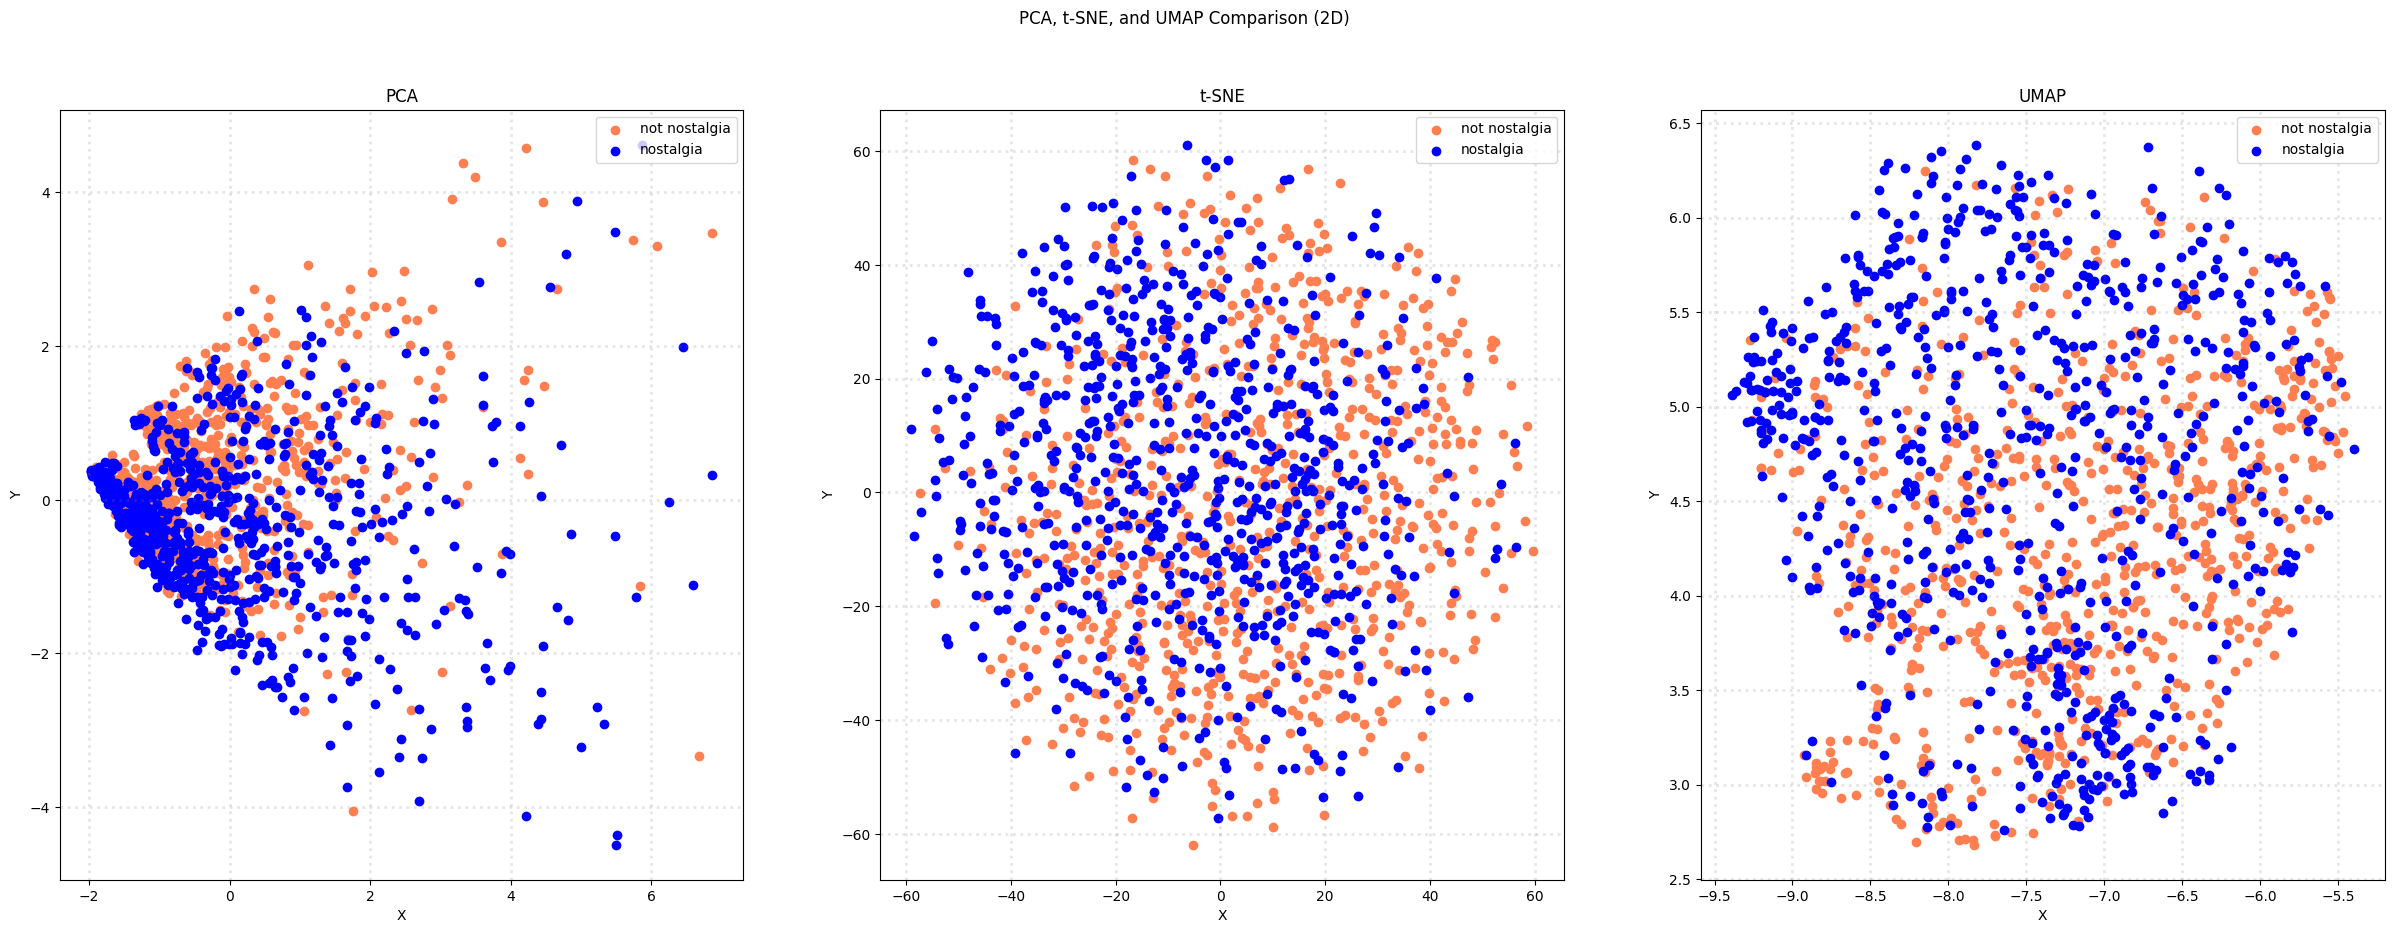

In [269]:
# Colors and categories for plotting
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique()

# Create 2D subplots for PCA, t-SNE, and UMAP
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('PCA, t-SNE, and UMAP Comparison (2D)')

# Define a function to create a 2D scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for each dimensionality reduction method
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

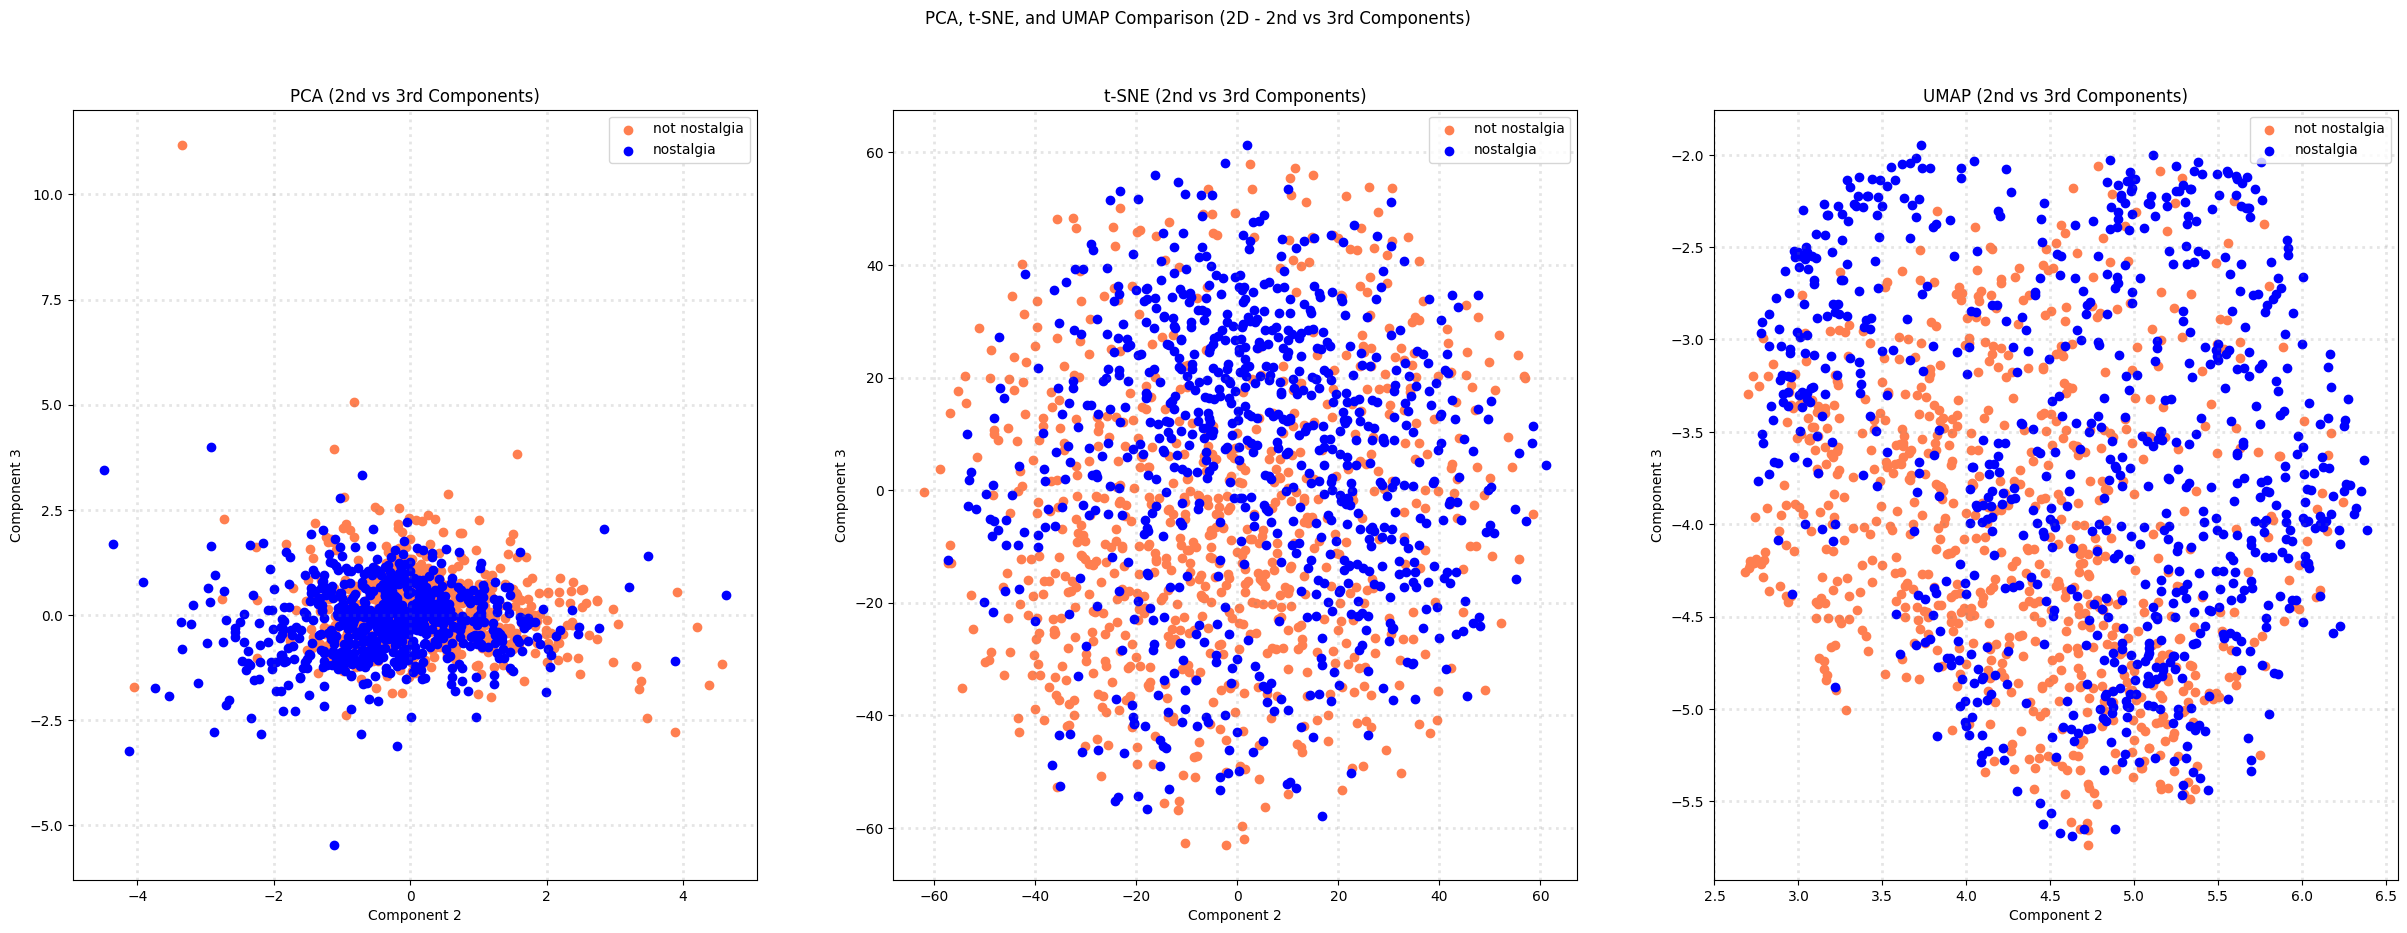

In [270]:
# Colors and categories for plotting
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique()

# Create 2D subplots for PCA, t-SNE, and UMAP using the 2nd and 3rd components
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('PCA, t-SNE, and UMAP Comparison (2D - 2nd vs 3rd Components)')

# Define a function to create a 2D scatter plot for the 2nd vs. 3rd components
def plot_scatter_alternate(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[1]  # Use 2nd component for x-axis
        ys = X_reduced[X['sentiment'] == category].T[2]  # Use 3rd component for y-axis
        ax.scatter(xs, ys, c=c, marker='o', label=category)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('Component 2')
    ax.set_ylabel('Component 3')
    ax.legend(loc='upper right')

# Create scatter plots for each dimensionality reduction method with the alternate components
plot_scatter_alternate(axes[0], X_pca_tdm, 'PCA (2nd vs 3rd Components)')
plot_scatter_alternate(axes[1], X_tsne_tdm, 't-SNE (2nd vs 3rd Components)')
plot_scatter_alternate(axes[2], X_umap_tdm, 'UMAP (2nd vs 3rd Components)')

plt.show()


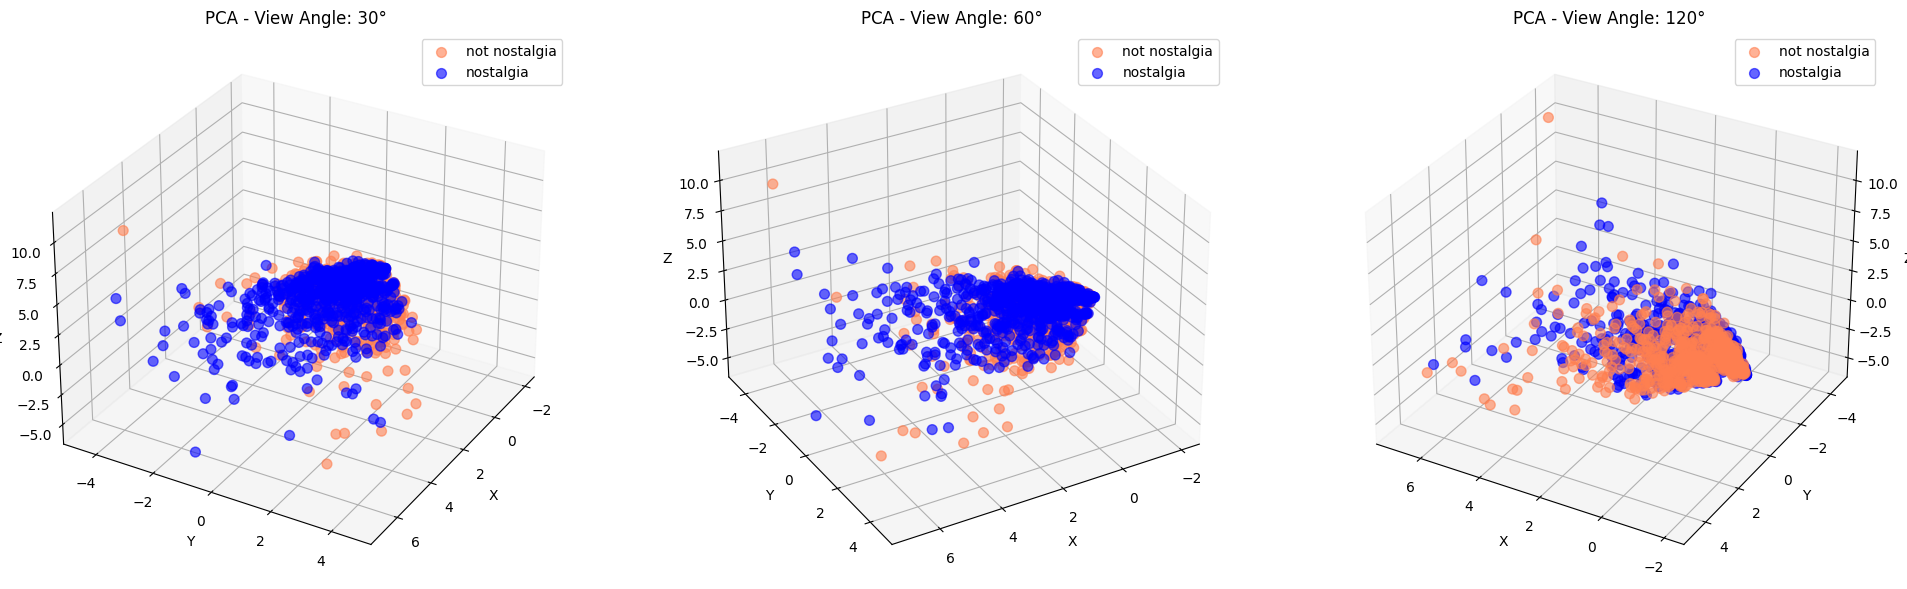

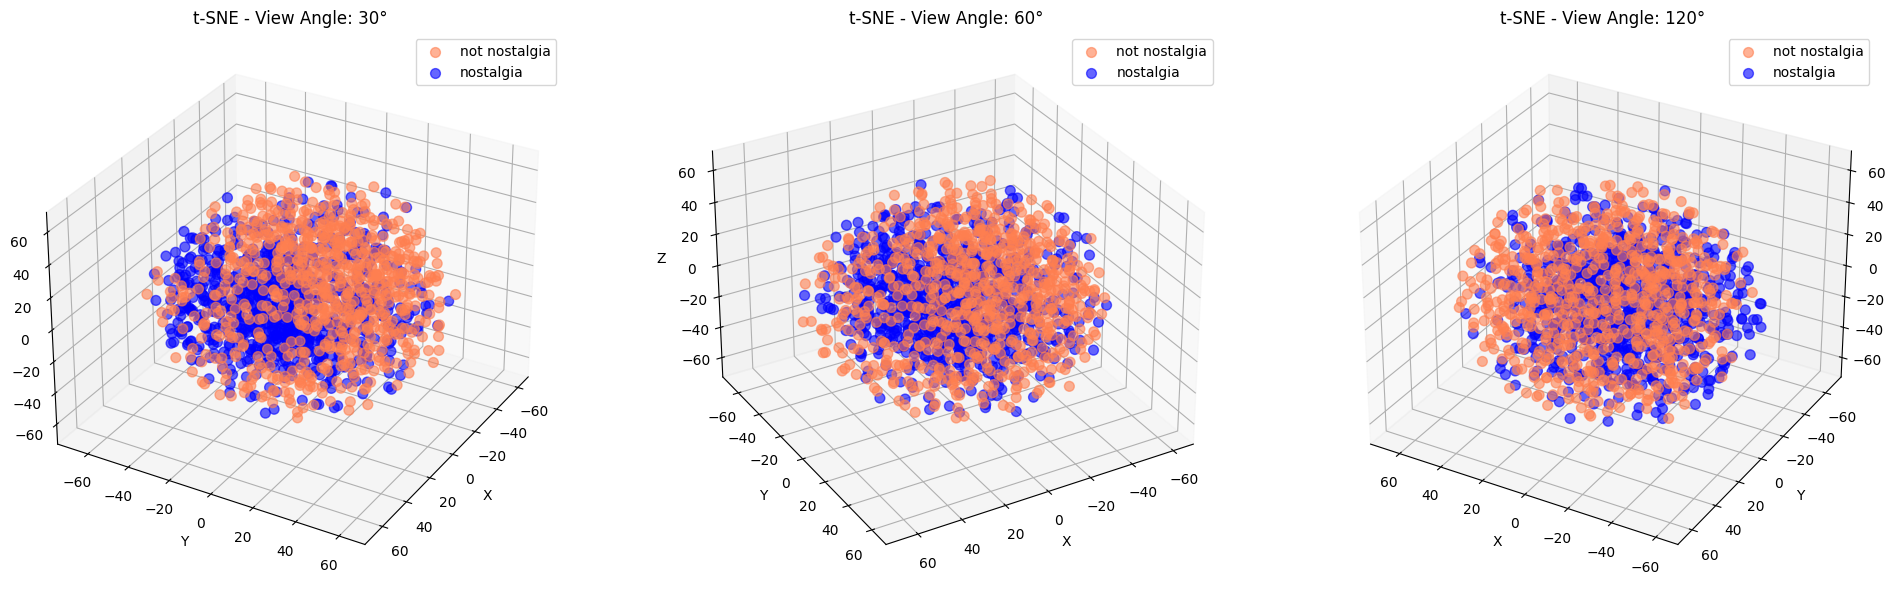

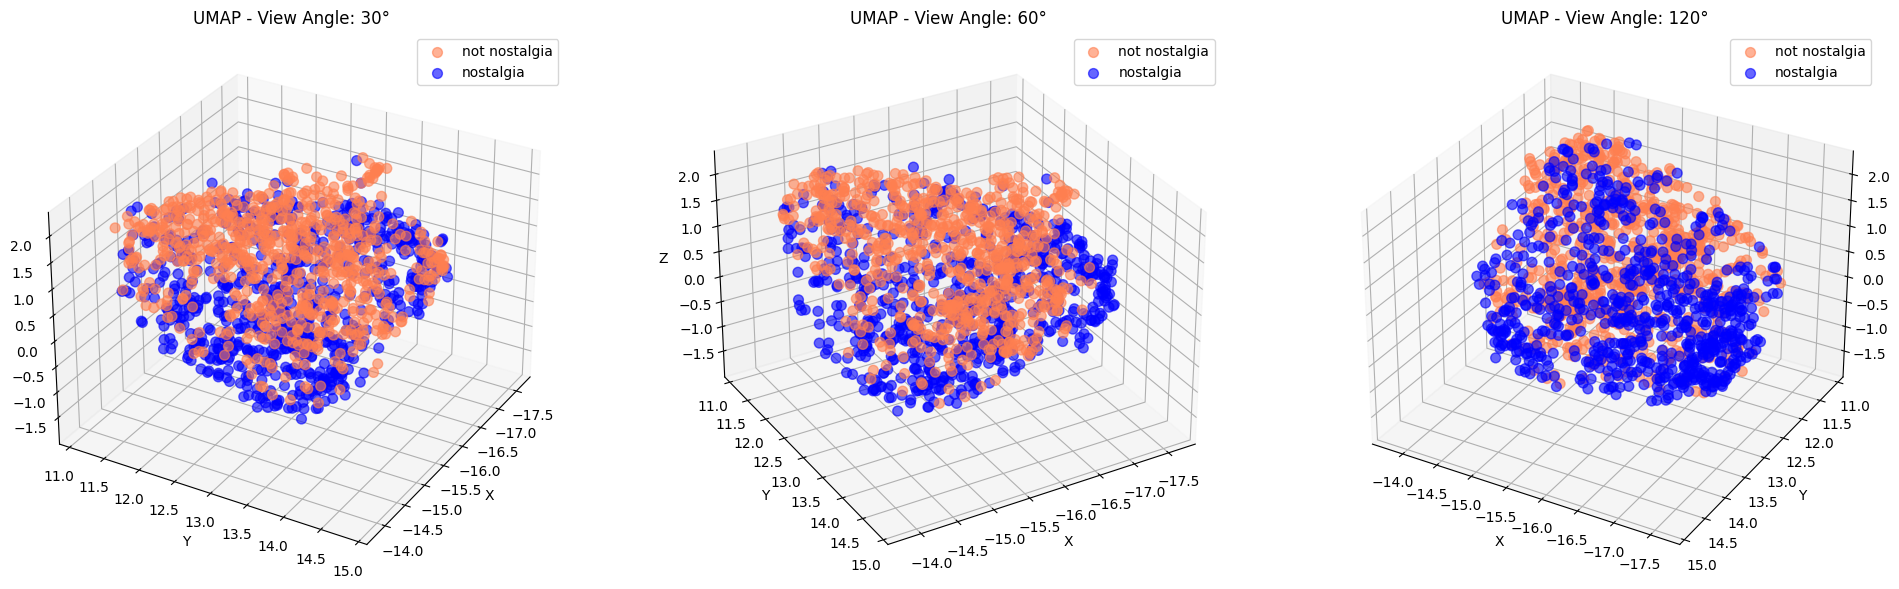

In [271]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Apply PCA, t-SNE, and UMAP to the term-document matrix data in 3D
X_pca_tdm = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

# Define a function to create 3D scatter plots with different angles
def plot_3d_scatter(X_reduced, title):
    fig = plt.figure(figsize=(24, 8))
    angles = [30, 60, 120]  # Different angles for the view

    for i, angle in enumerate(angles, start=1):
        ax = fig.add_subplot(1, 3, i, projection='3d')

        for c, category in zip(col, categories):
            indices = X['sentiment'] == category
            ax.scatter(X_reduced[indices, 0], X_reduced[indices, 1], X_reduced[indices, 2],
                       color=c, label=category, s=50, alpha=0.6)

        ax.set_title(f"{title} - View Angle: {angle}°")
        ax.view_init(30, angle)  # Set the viewing angle
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.legend()

    plt.show()

# Generate 3D scatter plots for each method with different angles
plot_3d_scatter(X_pca_tdm, 'PCA')
plot_3d_scatter(X_tsne_tdm, 't-SNE')
plot_3d_scatter(X_umap_tdm, 'UMAP')


## Discretization and Binarization

In [272]:

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()

mlb.fit(X.sentiment)
X['bin_category'] = mlb.transform(X['sentiment']).tolist()
X[0:9]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4      nostalgia  listening to his songs reminds me of my mum wh...   
5      nostalgia  Every time I heard this song as a child, I use...   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...   
8  not nostalgia           Wherever you  are you always in my heart   

   sentiment_label                                           unigrams  \
0                0  [He, was, a, singer, with, a, golden, voice, t...   
1                1  [The, mist, beautiful, voice, ever, I, listene...   
2                1  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3                0  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4                1  [listening, to, his, songs, reminds, me, of, m...   
5                1  [Every, time, I, heard, this, song, as, a, chi...   
6                1  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7                1  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8                0   [Wherever, you, are, you, always, in, my, heart]   

                                      tokenized_text bin_category  
0  {age, and, voice, at, great, He, Thank, was, m...          [1]  
1  {Never, and, forgotten, beautiful, voice, was,...          [0]  
2  {grew, and, songs., age, grow, so, were, like,...          [0]  
3  {years, and, song, tour., to, Mary, the, my, N...          [1]  
4  {mum, songs, reminds, him, his, listening, to,...          [0]  
5  {voice, song, your, many, to, touches, still, ...          [0]  
6  {was, to, listening, dad, the, 70's, teenager,...          [0]  
7  {and, he, to, Jim, ., the, puts, music., now, ...          [0]  
8        {heart, in, you, are, my, Wherever, always}          [1]

## Data exploration

In [273]:
# Retrieve 3 sample comments from the dataset for comparison
document_to_transform_1 = []
random_record_1 = X.iloc[50]  # Adjust index as needed
document_to_transform_1.append(random_record_1['comment'])

document_to_transform_2 = []
random_record_2 = X.iloc[100]  # Adjust index as needed
document_to_transform_2.append(random_record_2['comment'])

document_to_transform_3 = []
random_record_3 = X.iloc[150]  # Adjust index as needed
document_to_transform_3.append(random_record_3['comment'])

# Print the sample comments
print("Document 1:", document_to_transform_1)
print("Document 2:", document_to_transform_2)
print("Document 3:", document_to_transform_3)


Document 1: ['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
Document 2: ['I love this song reminds me of the love of my life']
Document 3: ['TURN MY MEMORIES BACK IN 1993, TO LAURA FROM COMO, ITALIA, THANK YOU, THANK YOU, THANK YOU']


In [274]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import binarize

# Initialize CountVectorizer (you can add stop words if needed)
count_vect = CountVectorizer(stop_words='english')
count_vect.fit(X['comment'])  # Fit vectorizer on the full dataset

# Transform the selected documents
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for absence, 1 for presence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# Print the binary vectors
print("Binary Count Vector for Document 1:\n", document_vector_count_1_bin.todense())
print("Binary Count Vector for Document 2:\n", document_vector_count_2_bin.todense())
print("Binary Count Vector for Document 3:\n", document_vector_count_3_bin.todense())


Binary Count Vector for Document 1:
 [[0 0 0 ... 0 0 0]]
Binary Count Vector for Document 2:
 [[0 0 0 ... 0 0 0]]
Binary Count Vector for Document 3:
 [[0 0 0 ... 0 0 0]]


In [275]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity between pairs of documents
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

# Calculate Cosine Similarity for each document with itself (should be 1)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print the cosine similarity results
print("Cosine Similarity between Document 1 and Document 2: {:.4f}".format(cos_sim_count_1_2[0][0]))
print("Cosine Similarity between Document 1 and Document 3: {:.4f}".format(cos_sim_count_1_3[0][0]))
print("Cosine Similarity between Document 2 and Document 3: {:.4f}".format(cos_sim_count_2_3[0][0]))

print("Cosine Similarity of Document 1 with itself: {:.4f}".format(cos_sim_count_1_1[0][0]))
print("Cosine Similarity of Document 2 with itself: {:.4f}".format(cos_sim_count_2_2[0][0]))
print("Cosine Similarity of Document 3 with itself: {:.4f}".format(cos_sim_count_3_3[0][0]))


Cosine Similarity between Document 1 and Document 2: 0.0788
Cosine Similarity between Document 1 and Document 3: 0.0000
Cosine Similarity between Document 2 and Document 3: 0.0000
Cosine Similarity of Document 1 with itself: 1.0000
Cosine Similarity of Document 2 with itself: 1.0000
Cosine Similarity of Document 3 with itself: 1.0000


## Classification

In [276]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1, 3), max_df=0.8, min_df=5)
X_tfidf = tfidf_vect.fit_transform(X['comment'])



In [277]:
import numpy as np

# Add features for sentiment keywords
X['nostalgic_words'] = X['comment'].apply(lambda x: sum(word in x for word in ['remember', 'old', 'love', 'childhood']))
X['not_nostalgic_words'] = X['comment'].apply(lambda x: sum(word in x for word in ['now', 'new', 'modern']))
X_augmented = np.hstack([X_tfidf.toarray(), X[['nostalgic_words', 'not_nostalgic_words']].values])


In [278]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split the augmented dataset
X_train, X_test, y_train, y_test = train_test_split(X_augmented, X['sentiment_label'], test_size=0.3, random_state=42)

# Train Naive Bayes with different alpha values
for alpha in [0.1, 0.5, 1.0]:
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(X_train, y_train)
    y_pred = nb_classifier.predict(X_test)

    # Evaluate accuracy and report
    print(f"Naive Bayes with alpha={alpha}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['not nostalgia', 'nostalgia'], digits=4))


Naive Bayes with alpha=0.1
Accuracy: 0.8555555555555555

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.8869    0.8305    0.8578       236
    nostalgia     0.8253    0.8832    0.8533       214

     accuracy                         0.8556       450
    macro avg     0.8561    0.8568    0.8555       450
 weighted avg     0.8576    0.8556    0.8556       450

Naive Bayes with alpha=0.5
Accuracy: 0.8466666666666667

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.8848    0.8136    0.8477       236
    nostalgia     0.8112    0.8832    0.8456       214

     accuracy                         0.8467       450
    macro avg     0.8480    0.8484    0.8467       450
 weighted avg     0.8498    0.8467    0.8467       450

Naive Bayes with alpha=1.0
Accuracy: 0.8444444444444444

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.8879    0.8051 

In [279]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for alpha
param_grid = {'alpha': np.arange(0.05, 1.5, 0.05)}

# Set up Grid Search with Cross-Validation
nb = MultinomialNB()
grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Output the best alpha and accuracy
print("Best Alpha:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)


Best Alpha: {'alpha': 0.35000000000000003}
Best Cross-Validated Accuracy: 0.8291866028708134


## TF-IDF

In [280]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(X['comment'])
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix.toarray(), X['sentiment_label'], test_size=0.2, random_state=42)

# Train the Multinomial Naive Bayes model
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)

# Make predictions
y_pred = NB_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['not nostalgia', 'nostalgia'], digits=4))


Accuracy: 0.86

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9365    0.7763    0.8489       152
    nostalgia     0.8046    0.9459    0.8696       148

     accuracy                         0.8600       300
    macro avg     0.8706    0.8611    0.8592       300
 weighted avg     0.8714    0.8600    0.8591       300



## TF-IDF features

In [281]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(X['comment'])

vectorizer.get_feature_names_out()

array(['00', '000', '045', ..., 'yup', 'zealand', 'zulus'], dtype=object)

In [282]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split data into train and test sets (using TF-IDF matrix and sentiment labels)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, X['sentiment_label'], test_size=0.2, random_state=42)

# Define and train each classifier
classifiers = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Loop through classifiers, train, predict, and print results
for name, clf in classifiers.items():
    print(f"\n--- {name} ---")

    # Fit model (for GaussianNB, convert TF-IDF sparse matrix to dense array)
    if name == "Gaussian Naive Bayes":
        clf.fit(X_train.toarray(), y_train)
        y_pred = clf.predict(X_test.toarray())
    else:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

    # Print performance metrics
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=['not nostalgia', 'nostalgia'], digits=4))



--- Multinomial Naive Bayes ---
Accuracy: 0.8666666666666667
               precision    recall  f1-score   support

not nostalgia     0.9000    0.8289    0.8630       152
    nostalgia     0.8375    0.9054    0.8701       148

     accuracy                         0.8667       300
    macro avg     0.8688    0.8672    0.8666       300
 weighted avg     0.8692    0.8667    0.8665       300


--- Gaussian Naive Bayes ---
Accuracy: 0.8166666666666667
               precision    recall  f1-score   support

not nostalgia     0.8012    0.8487    0.8243       152
    nostalgia     0.8345    0.7838    0.8084       148

     accuracy                         0.8167       300
    macro avg     0.8179    0.8162    0.8163       300
 weighted avg     0.8177    0.8167    0.8164       300


--- Bernoulli Naive Bayes ---
Accuracy: 0.9066666666666666
               precision    recall  f1-score   support

not nostalgia     0.9026    0.9145    0.9085       152
    nostalgia     0.9110    0.8986    0.90

## Visualization tools

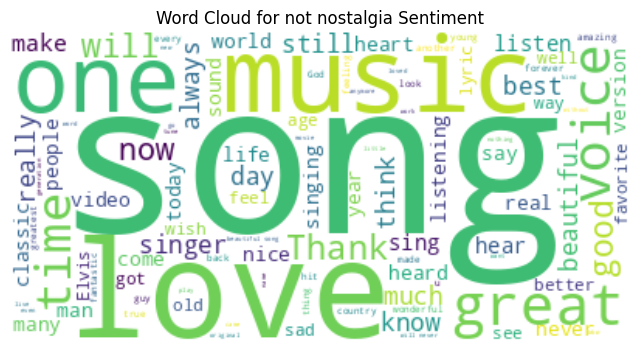

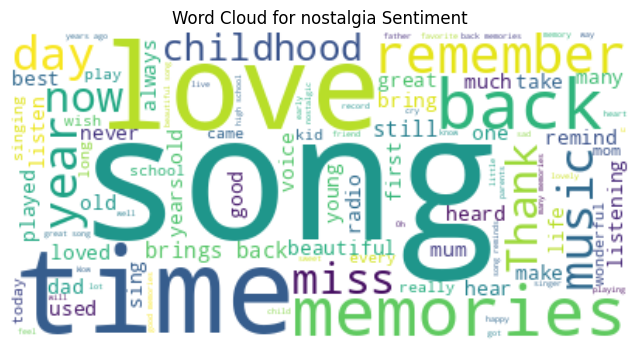

In [283]:
from wordcloud import STOPWORDS

# Define stop words for the word cloud
stop_words = set(STOPWORDS)

# Create word clouds for each sentiment category with stop words removed
for sentiment in X['sentiment'].unique():
    text = " ".join(X[X['sentiment'] == sentiment]['comment'])
    wordcloud = WordCloud(stopwords=stop_words, max_words=100, background_color='white').generate(text)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment} Sentiment")
    plt.show()


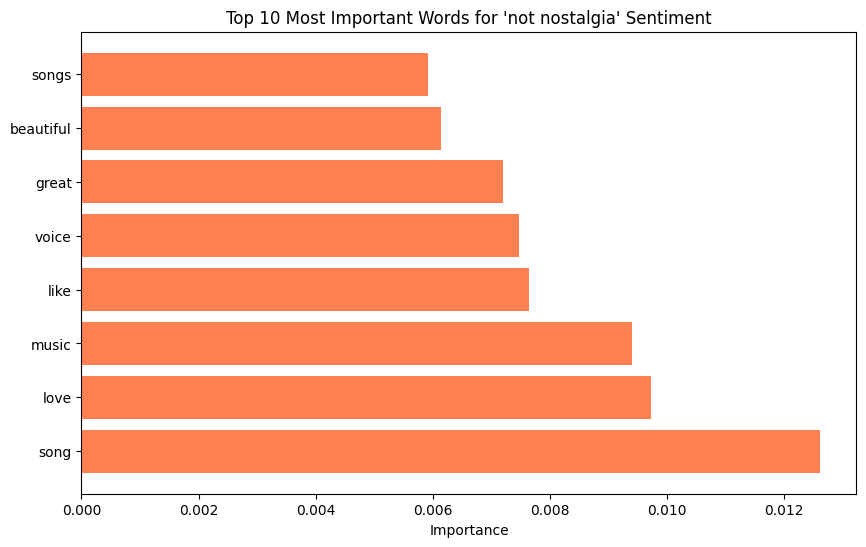

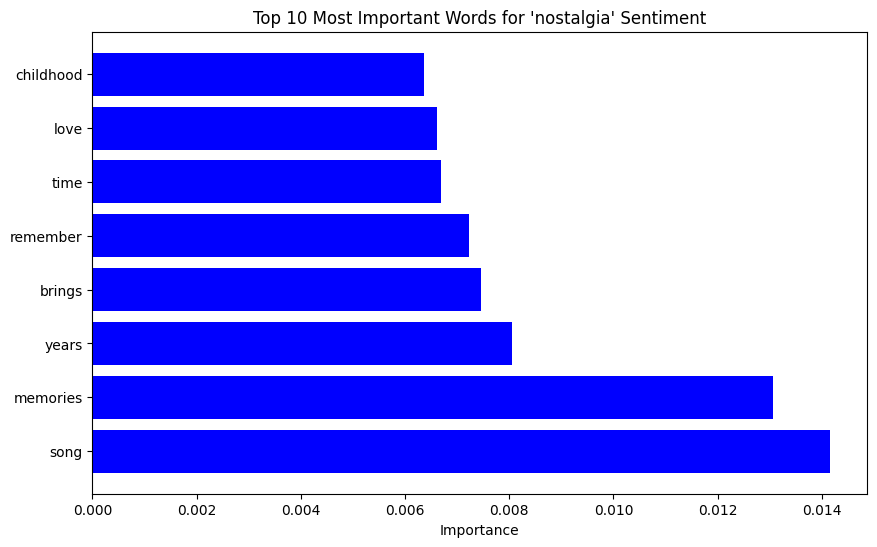

In [284]:
import numpy as np
import matplotlib.pyplot as plt

# Get the feature names from the TF-IDF vectorizer
feature_names = tfidf_vect.get_feature_names_out()
vocab_size = len(feature_names)

# Get the class log probabilities from the trained Naive Bayes model
class_log_prob = nb_classifier.feature_log_prob_

# Define the top N words to display
top_n = 10

# Plot top N most important words for each sentiment
for i, label in enumerate(['not nostalgia', 'nostalgia']):
    # Get top N feature indices for this class
    top_features = np.argsort(class_log_prob[i])[-top_n:]
    # Ensure indices don't exceed the vocabulary size
    top_features = [idx for idx in top_features if idx < vocab_size]

    # Extract top words and their probabilities
    top_words = [feature_names[index] for index in top_features]
    top_probs = class_log_prob[i, top_features]

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(top_words, np.exp(top_probs), color='coral' if i == 0 else 'blue')
    plt.title(f"Top {top_n} Most Important Words for '{label}' Sentiment")
    plt.xlabel("Importance")
    plt.gca().invert_yaxis()
    plt.show()


## Part 4

In the lab, several inefficiencies were identified in preprocessing, which could be improved to enhance model performance and clarity. For instance, we can optimize repeated sorting by caching sorted results where possible, and using TF-IDF instead of fixed frequency thresholds to make feature selection more adaptive across datasets. Additionally, creating custom stop word lists specific to each dataset can help remove irrelevant common terms that may not carry sentiment or category significance. Also, basic text preprocessing steps like handling punctuation, stemming, or lemmatization are essential to reduce noise, though challenging to implement uniformly across datasets.

When analyzing different datasets, classification techniques must be adjusted to fit the context of the data. In handling the concept of nostalgia, sometimes the frequency of the word is not enough to signify importance. The concept of a term frequency and inverse document frequency takes the naivety of just a term frequency and takes the analysis to a deeper level.

## Part 5
Comments have been added.

AI Usage: In creating some of the comments (around 15%), the code I used was fed through an LLM, asking it to generate comments wherever unclear, in addition to the comments I've already added. This is in case there are any confusing lines that I found to be clear for myself but not for others.